## How to visualize the results from the search and analysis

In [155]:
# Usage example:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import os
import pickle
import joblib
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer


SAVE_DIR = "Saved_files_new"

In [157]:
def plot_top_terms(freq_dict, ax, title, n_terms):
    terms = list(freq_dict.keys())[:n_terms]
    freqs = [freq_dict[term] for term in terms]
    
    ax.barh(terms, freqs)
    ax.set_title(title)
    ax.invert_yaxis()
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize=12) 


def plot_term_frequencies(filename, n_terms=20,save=False):
    file_prefix = filename.replace('.json', '')
    filepath=os.path.join(SAVE_DIR,filename)
    # Load frequencies
    with open(filepath, 'r', encoding='utf-8') as f:
        frequencies = json.load(f)
    
    # Plot settings
    #plt.style.use('seaborn')
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
    
    # Plot keywords
    plot_top_terms(frequencies['keywords'], ax1, f'Top {n_terms} Keywords', n_terms)
    plot_top_terms(frequencies['bigrams'], ax2, f'Top {n_terms} Bigrams', n_terms)
    plot_top_terms(frequencies['trigrams'], ax3, f'Top {n_terms} Trigrams', n_terms)
    
    plt.tight_layout()
    if save:
        output_file = os.path.join(SAVE_DIR, f"{file_prefix}_plots.png")
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        print(f"Plot saved as: {output_file}")
    plt.show()

In [158]:
def plot_frequencies(file_prefix, n_items=10, save=False):
    try:
        file_prefix = file_prefix.replace('.csv', '')
        # add the file name suffix as saved during search
        author_file = os.path.join(SAVE_DIR, f"{file_prefix}_author_frequencies.csv")
        venue_file = os.path.join(SAVE_DIR, f"{file_prefix}_venue_frequencies.csv")
        # Read data with error handling
        try:
            authors_df = pd.read_csv(author_file, sep=';', encoding='utf-8')
        except FileNotFoundError:
            print(f"Author frequency file not found: {author_file}")
            return
            
        try:
            venues_df = pd.read_csv(venue_file, sep=';', encoding='utf-8')
        except FileNotFoundError:
            print(f"Venue frequency file not found: {venue_file}")
            return
        
        # Get top n items
        top_authors = authors_df.nlargest(n_items, ['Frequency'])
        top_venues = venues_df.nlargest(n_items, ['Frequency'])
      
        # Create figure with two subplots side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
        # Plot authors
        sns.barplot(data=top_authors, x='Author', y='Frequency', ax=ax1)
        ax1.set_xticks(range(len(top_authors)))
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right',fontsize=14)
        ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=14)
        ax1.set_title(f"Top {n_items} Authors")
        ax1.set_xlabel('')
        ax1.set_ylabel('Number of Publications')
        
        # Plot venues
        sns.barplot(data=top_venues, x='Venue', y='Frequency', ax=ax2)
        ax2.set_xticks(range(len(top_venues)))
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
        ax2.set_yticklabels(ax2.get_yticklabels(),fontsize=14)
        ax2.set_title(f"Top {n_items} Venues")
        ax2.set_xlabel('')
        ax2.set_ylabel('Number of Publications')
        
        # Adjust layout and save with matching filename
        plt.tight_layout()
        if save:
            output_file = os.path.join(SAVE_DIR, f"{file_prefix}_frequency_plots.png")
            plt.savefig(output_file, dpi=300, bbox_inches='tight')
            print(f"Plot saved as: {output_file}")
        plt.show()
        
    except Exception as e:
        print(f"Error occurred: {str(e)}")



C:\Users\STSI\AppData\Local\Temp\ipykernel_23172\3732986153.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)
C:\Users\STSI\AppData\Local\Temp\ipykernel_23172\3732986153.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)
C:\Users\STSI\AppData\Local\Temp\ipykernel_23172\3732986153.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)
C:\Users\STSI\AppData\Local\Temp\ipykernel_23172\3732986153.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)
C:\U

Plot saved as: Saved_files_new\term_frequencies_2025_06_06_plots.png


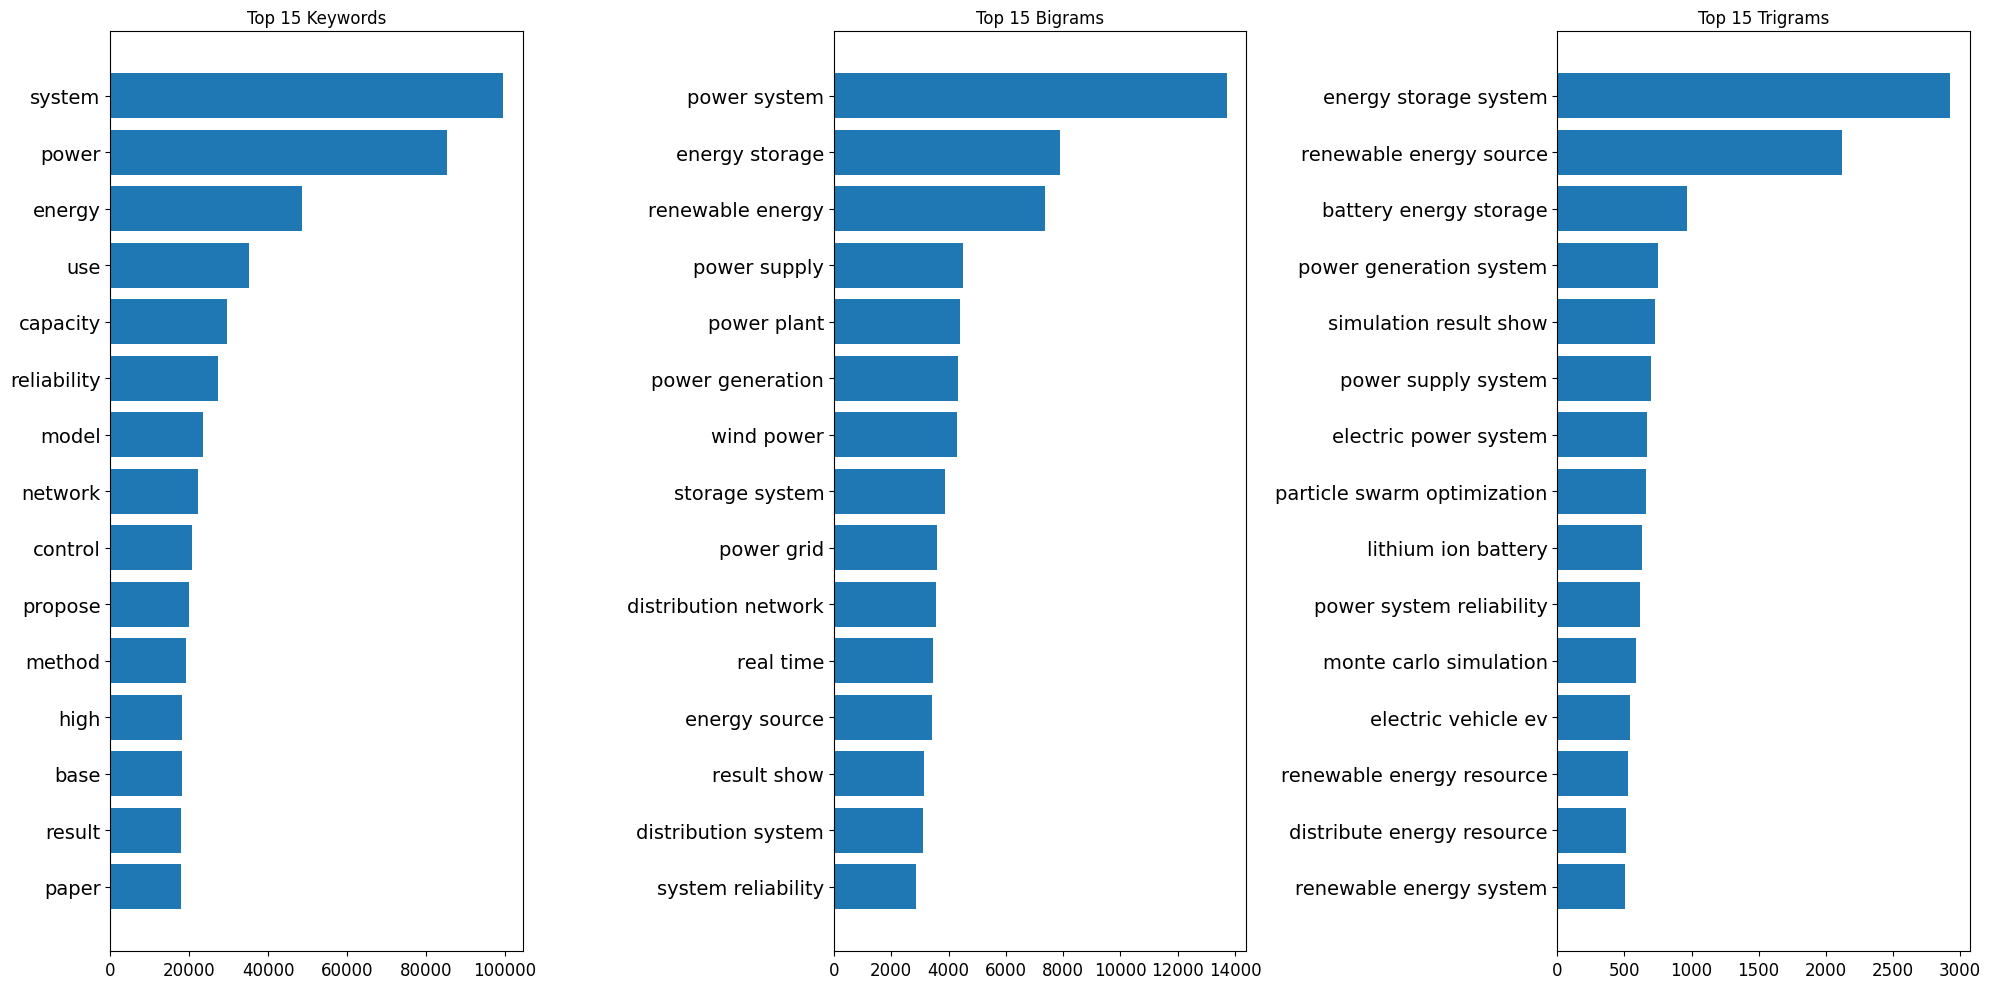

Author frequency file not found: Saved_files_new\semantic_scholar_2025_06_04_load_flow_optimal_load_flow_power_system_author_frequencies.csv


In [160]:
# plot the keyword/ngram frequency and author frequency
n=15
save=True
plot_term_frequencies('term_frequencies_2025_06_06.json',n_terms=n, save=save)
# Usage
#filename = "semantic_scholar_2025_02_14_reliability_resilience_power_systems"
#filename = "semantic_scholar_2025_06_04_graph_neural_network_power_system_analysis_reliability_analysis"
filename = "semantic_scholar_2025_06_04_load_flow_optimal_load_flow_power_system"

plot_frequencies(filename, n_items=n, save=save)


#### Old plotting functions

In [10]:

def plot_topic_keywords(topic_keywords, field):
    """Plot keyword weights for each topic in a field"""
    num_topics = len(topic_keywords)
    fig, axes = plt.subplots(num_topics, 1, figsize=(12, 4*num_topics))
    
    for idx, (topic_idx, keywords) in enumerate(topic_keywords.items()):
        words, weights = zip(*keywords['word_weights'])
        ax = axes[idx] if num_topics > 1 else axes
        ax.barh(words, weights)
        ax.set_title(f'{field} - Topic {topic_idx + 1} Keywords')
        ax.invert_yaxis()
    
    plt.tight_layout()
    plt.show()

def plot_keyword_frequency(df):
    keyword_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    keyword_matrix = keyword_vectorizer.fit_transform(df['processed_text'])
    keywords = keyword_vectorizer.get_feature_names_out()
    keyword_freq = keyword_matrix.sum(axis=0).A1
    keyword_freq_dict = dict(zip(keywords, keyword_freq))
    top_keywords = sorted(keyword_freq_dict.items(), key=lambda x: x[1], reverse=True)[:20]

    plt.figure(figsize=(12, 6))
    keywords, frequencies = zip(*top_keywords)
    plt.bar(keywords, frequencies)
    plt.title('Top 20 Keywords')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
def plot_ngram_frequency(df, n=2):
    ngram_vectorizer = CountVectorizer(ngram_range=(n,n), max_df=0.95, min_df=2, stop_words='english')
    ngram_matrix = ngram_vectorizer.fit_transform(df['processed_text'])
    ngrams = ngram_vectorizer.get_feature_names_out()
    ngram_freq = ngram_matrix.sum(axis=0).A1
    ngram_freq_dict = dict(zip(ngrams, ngram_freq))
    top_ngrams = sorted(ngram_freq_dict.items(), key=lambda x: x[1], reverse=True)[:20]

    plt.figure(figsize=(12, 6))
    ngrams, frequencies = zip(*top_ngrams)
    plt.bar(ngrams, frequencies)
    plt.title(f'Top 20 {n}-grams')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()    

def plot_field_topic_comparison(df_analyzed, fields_to_analyze):
    """Plot comparison of topic distributions across fields"""
    plt.figure(figsize=(12, 6))
    
    field_counts = []
    for field in fields_to_analyze:
        # Count papers where this field is the primary topic
        count = df_analyzed[f'{field}_Primary_Topic'].notna().sum()
        field_counts.append(count)
    
    plt.bar(fields_to_analyze, field_counts)
    plt.title('Papers per Field of Study')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Papers')
    plt.tight_layout()
    plt.show()

def plot_topic_distribution(df_analyzed, number_of_papers=20):
    """Plot topic distribution heatmap for the analyzed DataFrame"""
    # Select columns that contain topic probabilities or assignments
    topic_columns = [col for col in df_analyzed.columns if 'Topic' in col and 'Index' not in col]
    if not topic_columns:
        print("No topic columns found for plotting.")
        return

    data = df_analyzed[topic_columns].iloc[:number_of_papers]
    if data.empty:
        print("No data available for plotting.")
        return

    plt.figure(figsize=(12, 6))
    sns.heatmap(data, cmap='YlOrRd', annot=False)
    plt.title(f'Topic Distribution (First {number_of_papers} Papers)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()





In [8]:
# Load results from csv file if not already in df:
filename = "semantic_scholar_2025_02_28_analyzed_results.csv"
df_analyzed = pd.read_csv(os.path.join(SAVE_DIR, filename), sep=';', encoding='utf-8')



In [13]:
print(df_analyzed.columns)

Index(['Unnamed: 0', 'paperId', 'title', 'abstract', 'venue', 'year',
       'citationCount', 'fieldsOfStudy', 'authors', 'text', 'processed_text',
       'Primary_Topic_Index', 'Secondary_Topic_Index', 'Primary_Topic',
       'Secondary_Topic', 'Primary_Score', 'Dominance_Ratio'],
      dtype='object')


In [14]:
# Plot topic distribution for a specific field
#plot_topic_distribution(df_analyzed, number_of_papers=20)

# Plot keyword weights for topics in a field
plot_topic_keywords(topic_keywords, 'Computer Science')

# Plot comparison across fields
plot_field_topic_comparison(df_analyzed, fields_to_analyze)


NameError: name 'topic_keywords' is not defined

In [ ]:
# Define your fields
fields_to_analyze = ['Computer Science', 'Economics', 'Engineering', 'Physics', 'Mathematics']

# Create your visualizations using the loaded data
plot_topic_distribution(df_analyzed, 'Computer Science')
plot_field_topic_comparison(df_analyzed, fields_to_analyze)

#### New plotting functions

In [147]:
# Helper function to get topic names
def get_topic_name(topic_idx, topic_names):
    """Fetch topic name using string keys and clean up quotes."""
    names = topic_names.get('all', topic_names)
    name = names.get(str(topic_idx), f"Topic {topic_idx}")
    return name.strip('"')


def plot_topic_keywords_with_names(topic_keywords, topic_names, top_words=10):
    """Plot keyword weights for each topic with generated names"""
    num_topics = len(topic_keywords)
    fig, axes = plt.subplots(num_topics, 1, figsize=(14, 5*num_topics))
    
    if num_topics == 1:
        axes = [axes]
    
    for idx, (topic_idx, keywords) in enumerate(topic_keywords.items()):
        words, weights = zip(*keywords['word_weights'][:top_words])
        ax = axes[idx]
        
        # Create horizontal bar plot
        bars = ax.barh(words, weights, color='steelblue', alpha=0.7)
        
        # Get topic name from your generated names
        topic_name = get_topic_name(topic_idx, topic_names)
        ax.set_title(f'Topic {topic_idx}: {topic_name}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Word Weight', fontsize=12)
        ax.invert_yaxis()
        
        # Add value labels on bars
        for bar, weight in zip(bars, weights):
            ax.text(weight + 0.001, bar.get_y() + bar.get_height()/2, 
                   f'{weight:.3f}', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()

def plot_topic_importance_with_names(df_analyzed, topic_names):
    """Plot topic importance using actual topic assignments"""
    # Count papers assigned to each primary topic
    topic_counts = df_analyzed['Primary_Topic'].value_counts()
    
    plt.figure(figsize=(12, 8))
    bars = plt.bar(range(len(topic_counts)), topic_counts.values, 
                   color='lightcoral', alpha=0.7)
    
    # Use topic names for x-axis labels
    topic_labels = [get_topic_name(i, topic_names) for i in range(len(topic_counts))]

    plt.xticks(range(len(topic_counts)), topic_labels, rotation=45, ha='right')
    
    plt.title('Topic Importance (Number of Papers per Topic)', fontsize=16, fontweight='bold')
    plt.xlabel('Topics', fontsize=12)
    plt.ylabel('Number of Papers', fontsize=12)
    
    # Add value labels on bars
    for bar, count in zip(bars, topic_counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                str(count), ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()


def plot_topic_ngrams_with_names(df_analyzed, topic_names, n=2, top_k=10):
    """Plot top n-grams for each named topic with NaN checks"""
    # Filter and clean data
    df_analyzed = df_analyzed.dropna(subset=['Primary_Topic', 'processed_text'])
    df_analyzed['processed_text'] = df_analyzed['processed_text'].fillna('').astype(str)
    
    unique_topics = df_analyzed['Primary_Topic'].unique()
    
    fig, axes = plt.subplots(len(unique_topics), 1, figsize=(14, 5*len(unique_topics)))
    if len(unique_topics) == 1:
        axes = [axes]
    
    for idx, topic in enumerate(unique_topics):
        # Get documents for this topic
        topic_docs = df_analyzed[df_analyzed['Primary_Topic'] == topic]['processed_text']
        
        # Final cleaning before vectorization
        topic_docs = topic_docs.dropna().astype(str)
        topic_docs = topic_docs[topic_docs.str.strip() != '']
        
        if topic_docs.empty:
            print(f"No valid documents for topic: {topic}")
            continue
            
        # Extract n-grams
        vectorizer = CountVectorizer(
            ngram_range=(n,n), 
            max_df=0.95, 
            min_df=2,
            stop_words='english'  # Add if not already handled in preprocessing
        )
        
        try:
            ngram_matrix = vectorizer.fit_transform(topic_docs)
            ngrams = vectorizer.get_feature_names_out()
            ngram_freq = ngram_matrix.sum(axis=0).A1
        
            # Get top n-grams
            top_ngrams = sorted(zip(ngrams, ngram_freq), 
                           key=lambda x: x[1], reverse=True)[:top_k]
        except ValueError as e:
            print(f"Error processing topic '{topic}': {e}")
            continue
        
        if top_ngrams:
            ngrams, frequencies = zip(*top_ngrams)
            ax = axes[idx]
            bars = ax.barh(ngrams, frequencies, color='darkgreen', alpha=0.7)
            ax.set_title(f'{topic} - Top {n}-grams', fontsize=14, fontweight='bold')
            ax.invert_yaxis()
            
            # Add frequency labels
            for bar, freq in zip(bars, frequencies):
                ax.text(freq + 0.1, bar.get_y() + bar.get_height()/2, 
                       str(freq), va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()




In [148]:
# one time need to clean up the nan values from processed_text
# Clean the processed_text column globally
df_analyzed['processed_text'] = df_analyzed['processed_text'].fillna('').astype(str)

# Remove rows where processed_text is empty
df_analyzed = df_analyzed[df_analyzed['processed_text'].str.strip() != '']

In [149]:
# Needs LDA model and topic names
def create_custom_topic_visualization(lda_model, vectorizer, topic_distributions, topic_names, save_path=None):
    """Create a better topic visualization with proper scaling"""
    import numpy as np
    from sklearn.manifold import TSNE
    import matplotlib.pyplot as plt

    # Get the correct number of topics from the LDA model
    n_topics = lda_model.n_components  # Corrected line

    # Calculate topic sizes (number of papers per topic)
    topic_sizes = np.sum(topic_distributions, axis=0)

    # Adjust perplexity based on the number of topics
    perplexity = min(30, n_topics - 1) if n_topics > 1 else 1  # Handle edge cases

    # Use log scaling for bubble sizes and normalize
    sizes = np.log1p(topic_sizes) * 100
    sizes = (sizes - sizes.min()) / (sizes.max() - sizes.min()) * 500 + 50  # 50-550 range

    # Get topic-word matrix and apply t-SNE
    topic_word_matrix = lda_model.components_
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    topic_coords = tsne.fit_transform(topic_word_matrix)

    # Create the plot
    fig, ax = plt.subplots(figsize=(15, 10))
    scatter = ax.scatter(topic_coords[:, 0], topic_coords[:, 1], 
                        s=sizes, alpha=0.7, c=range(n_topics), cmap='tab10', edgecolor='k')

    # Add annotations
    for i, (x, y) in enumerate(topic_coords):
        topic_name = topic_names.get(str(i), f"Topic {i}").strip('"')
        if len(topic_name) > 20:
            topic_name = topic_name[:20] + "..."
        ax.annotate(f'{i}: {topic_name}', (x, y), 
                   xytext=(10, 10), textcoords='offset points',
                   fontsize=9, fontweight='bold',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

    # Add legend and labels
    legend_sizes = [50, 200, 400]
    legend_labels = ['Small', 'Medium', 'Large']
    for size, label in zip(legend_sizes, legend_labels):
        ax.scatter([], [], s=size, c='gray', alpha=0.7, label=f'{label} topic')
    ax.legend(title='Topic Size', loc='upper right')
    ax.set_title('Topic Distribution Map (t-SNE)', fontsize=16, fontweight='bold')
    ax.set_xlabel('t-SNE Dimension 1')
    ax.set_ylabel('t-SNE Dimension 2')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.show()

    # Print topic sizes for reference
    print("\nTopic sizes (number of papers):")
    for i, size in enumerate(topic_sizes):
        topic_name = topic_names.get(str(i), f"Topic {i}").strip('"')
        print(f"Topic {i} ({topic_name}): {int(size)} papers")



def plot_topic_document_heatmap(topic_distributions, topic_names, n_docs=50):
    """Create a heatmap showing topic distributions across documents"""
    plt.figure(figsize=(12, 8))
    
    # Select subset of documents for visualization
    subset_distributions = topic_distributions[:n_docs]
    
    # Create heatmap
    sns.heatmap(subset_distributions.T, 
                cmap='YlOrRd', 
                cbar_kws={'label': 'Topic Probability'},
                yticklabels=[get_topic_name(i, topic_names) 
                           for i in range(len(topic_names))])
    
    plt.title(f'Topic Distribution Across Documents (First {n_docs} papers)', 
              fontsize=16, fontweight='bold')
    plt.xlabel('Documents', fontsize=12)
    plt.ylabel('Topics', fontsize=12)
    plt.tight_layout()
    plt.show()


In [150]:
def load_complete_analysis_data(date_string):
    """Load all saved analysis data including LDA model"""
    
    print(f"Loading complete analysis data for {date_string}...")
    
    # Load the analyzed dataframe
    df_filename = os.path.join(SAVE_DIR, f"semantic_scholar_{date_string}_analyzed_results.csv")
    df_analyzed = pd.read_csv(df_filename, sep=';', encoding='utf-8')
    
    # Load topic names
    topic_names_filename = os.path.join(SAVE_DIR, f"semantic_scholar_{date_string}_topic_names.json")
    with open(topic_names_filename, 'r', encoding='utf-8') as f:
        topic_names = json.load(f)
    
    # Load topic keywords
    topic_keywords_filename = os.path.join(SAVE_DIR, f"topic_keywords_{date_string}.json")
    with open(topic_keywords_filename, 'r', encoding='utf-8') as f:
        topic_keywords_data = json.load(f)
    
    # Convert back to the expected format
    topic_keywords = {}
    for topic_idx, data in topic_keywords_data.items():
        topic_keywords[int(topic_idx)] = data
    
    # Load LDA model and components
    lda_filename = os.path.join(SAVE_DIR, f"lda_model_{date_string}.joblib")
    lda_model = joblib.load(lda_filename)
    
    vectorizer_filename = os.path.join(SAVE_DIR, f"vectorizer_{date_string}.joblib")
    vectorizer = joblib.load(vectorizer_filename)
    
    distributions_filename = os.path.join(SAVE_DIR, f"topic_distributions_{date_string}.npy")
    topic_distributions = np.load(distributions_filename)
    
    # Load author analysis
    author_filename = os.path.join(SAVE_DIR, f"semantic_scholar_{date_string}_author_analysis.csv")
    author_stats = pd.read_csv(author_filename, sep=';', encoding='utf-8')
    
    # Load top papers
    top_papers_filename = os.path.join(SAVE_DIR, f"top_papers_{date_string}.json")
    with open(top_papers_filename, 'r', encoding='utf-8') as f:
        top_papers = json.load(f)
    
    print(f"Successfully loaded all components for {date_string}")
    
    return {
        'df_analyzed': df_analyzed,
        'topic_names': topic_names,
        'topic_keywords': topic_keywords,
        'lda_model': lda_model,
        'vectorizer': vectorizer,
        'topic_distributions': topic_distributions,
        'author_stats': author_stats,
        'top_papers': top_papers
    }


def plot_top_ngrams_per_topic(df, topic_col, text_col, topic_names, ngram_range=(2,3), top_k=10):
    """Plot top n-grams (including both 2-grams and 3-grams) for each named topic"""
    unique_topics = [t for t in df[topic_col].unique() if pd.notna(t)]
    
    for topic in unique_topics:
        # Get documents for this topic
        topic_docs = df[df[topic_col] == topic][text_col].dropna().astype(str)
        
        if topic_docs.empty:
            continue
            
        # Extract both 2-grams and 3-grams
        vectorizer = CountVectorizer(ngram_range=ngram_range, max_df=0.95, min_df=2)
        ngram_matrix = vectorizer.fit_transform(topic_docs)
        ngrams = vectorizer.get_feature_names_out()
        ngram_freq = ngram_matrix.sum(axis=0).A1
        
        # Get top n-grams
        top_ngrams = sorted(zip(ngrams, ngram_freq), 
                          key=lambda x: x[1], reverse=True)[:top_k]
        
        if not top_ngrams:
            continue
            
        ngram_labels, freqs = zip(*top_ngrams)
        
        # Create plot
        plt.figure(figsize=(12, 6))
        bars = plt.barh(ngram_labels, freqs, color='teal')
        plt.title(f"Top {ngram_range[0]}-{ngram_range[1]}-grams in Topic {topic}: {topic_names.get(str(topic), f'Topic {topic}')}")
        plt.xlabel("Frequency")
        plt.gca().invert_yaxis()
        
        # Add frequency labels
        for bar, freq in zip(bars, freqs):
            plt.text(bar.get_width() + 0.1, 
                    bar.get_y() + bar.get_height()/2, 
                    str(freq), 
                    va='center')
            
        plt.tight_layout()
        plt.show()


def plot_ngram_correlation_per_topic(df, topic_col, text_col, topic_names, n=2, min_corr=0.2, top_k=10):
    """Visualize n-gram co-occurrence patterns within each topic"""
    unique_topics = [t for t in df[topic_col].unique() if pd.notna(t)]
    for topic in unique_topics:
        topic_docs = df[df[topic_col] == topic][text_col].dropna().astype(str)
        if topic_docs.empty:
            continue
        
        # Extract n-grams and filter top_k
        vectorizer = CountVectorizer(ngram_range=(n, n), max_df=0.95, min_df=2)
        ngram_matrix = vectorizer.fit_transform(topic_docs).toarray()
        ngrams = vectorizer.get_feature_names_out()
        
        # Select top_k most frequent n-grams
        if len(ngrams) == 0:
            continue
        freq = ngram_matrix.sum(axis=0)
        top_indices = np.argsort(freq)[-top_k:]
        ngram_matrix = ngram_matrix[:, top_indices]
        ngrams = ngrams[top_indices]
        
        # Compute correlation matrix
        corr_matrix = np.corrcoef(ngram_matrix, rowvar=False)
        mask = np.abs(corr_matrix) > min_corr
        
        # Create heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix * mask, 
                    xticklabels=ngrams, yticklabels=ngrams, 
                    cmap='coolwarm', center=0, annot=True)
        topic_name = topic_names.get(str(topic), f"Topic {topic}").strip('"')
        plt.title(f"Correlation of {n}-grams in Topic {topic}: {topic_name}")
        plt.tight_layout()
        plt.show()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def plot_ngram_bubble_chart_for_topic(df, topic_value, topic_col, text_col, top_k=20, method='tfidf'):
    # Filter for the selected topic
    topic_docs = df[df[topic_col] == topic_value][text_col].dropna().astype(str)
    if topic_docs.empty:
        print(f"No documents for topic: {topic_value}")
        return

    # Vectorize bigrams and trigrams
    if method == 'tfidf':
        vectorizer = TfidfVectorizer(ngram_range=(2, 3), max_df=0.95, min_df=2)
    else:
        vectorizer = CountVectorizer(ngram_range=(2, 3), max_df=0.95, min_df=2)
    ngram_matrix = vectorizer.fit_transform(topic_docs)
    ngrams = vectorizer.get_feature_names_out()

    # Get importance (TF-IDF sum or frequency sum)
    ngram_importance = np.asarray(ngram_matrix.sum(axis=0)).ravel()

    # Select top_k n-grams
    if len(ngrams) == 0:
        print(f"No n-grams found for topic: {topic_value}")
        return
    top_indices = np.argsort(ngram_importance)[-top_k:]
    top_ngrams = ngrams[top_indices]
    top_importance = ngram_importance[top_indices]
    top_matrix = ngram_matrix[:, top_indices].toarray().T  # shape: (top_k, n_docs)

    # Use t-SNE to cluster n-grams by their usage across documents
    if top_matrix.shape[0] > 2:
        tsne = TSNE(n_components=2, random_state=42, perplexity=min(10, top_matrix.shape[0]-1))
        coords = tsne.fit_transform(top_matrix)
    else:
        coords = np.vstack([np.zeros_like(top_importance), np.arange(len(top_importance))]).T

    # Bubble chart
    plt.figure(figsize=(10, 7))
    sizes = (top_importance - top_importance.min()) / (top_importance.max() - top_importance.min() + 1e-6) * 2000 + 200
    scatter = plt.scatter(coords[:, 0], coords[:, 1], s=sizes, c=top_importance, cmap='viridis', alpha=0.7, edgecolor='k')
    for i, (x, y) in enumerate(coords):
        plt.text(x, y, top_ngrams[i], fontsize=10, ha='center', va='center')
    plt.title(f'Bubble Chart of Top 2- and 3-grams in Topic: {topic_value}', fontsize=14)
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.colorbar(scatter, label='Importance')
    plt.tight_layout()
    plt.show()


In [ ]:
# Later, load everything without recreating
string = "2025_06_0602_14_reliability_resilience_power_systems"  # Use your actual date
analysis_data = load_complete_analysis_data(string)

# Extract components for visualization
df_analyzed = analysis_data['df_analyzed']
topic_names = analysis_data['topic_names']
topic_keywords = analysis_data['topic_keywords']
lda_model = analysis_data['lda_model']
vectorizer = analysis_data['vectorizer']
topic_distributions = analysis_data['topic_distributions']

Loading complete analysis data for 2025_06_0602_14_reliability_resilience_power_systems...
Successfully loaded all components for 2025_06_0602_14_reliability_resilience_power_systems


In [153]:
# Extract all components

# Create the complete visualization suite
def visualize_complete_analysis_from_files(analysis_data, save_dir=None):
    """Complete visualization suite using loaded data"""
    import os
    df_analyzed = analysis_data['df_analyzed']
    topic_names = analysis_data['topic_names']
    topic_keywords = analysis_data['topic_keywords']
    lda_model = analysis_data['lda_model']
    vectorizer = analysis_data['vectorizer']
    topic_distributions = analysis_data['topic_distributions']

    print("=== Complete Topic Analysis Visualization ===\n")
    
    # 1. Topic keywords with names
    print("1. Topic Keywords with Generated Names:")
    plot_topic_keywords_with_names(topic_keywords, topic_names)
    
    # 2. Topic importance
    print("2. Topic Importance:")
    plot_topic_importance_with_names(df_analyzed, topic_names)
    
    # 3. Topic distribution map
    print("3. Topic Distribution Map:")
    save_path = os.path.join(save_dir, "tsne_topic_distribution_map.png") if save_dir else None
    create_custom_topic_visualization(
        lda_model, vectorizer, topic_distributions, topic_names['all'], save_path=save_path
    )
    
    # 4. Topic-document heatmap
    print("4. Topic-Document Distribution:")
    plot_topic_document_heatmap(topic_distributions, topic_names['all'])
    
    # 5. N-gram analysis per topic
    print("5. N-gram Analysis per Topic:")
    plot_top_ngrams_per_topic(df_analyzed, 'Primary_Topic', 'processed_text', 
                         topic_names['all'], ngram_range=(2,3), top_k=15)
    
    # 6. N-gram Correlation per Topic
    #print("6. N-gram Correlation per Topic:")
    #plot_ngram_correlation_per_topic(df_analyzed, 'Primary_Topic', 'processed_text', topic_names['all'])

    # N-gram Bubble chart per Topic
    for topic in df_analyzed['Primary_Topic'].unique():
        if pd.notna(topic):
            plot_ngram_bubble_chart_for_topic(
                df_analyzed, topic, topic_col='Primary_Topic', text_col='processed_text', top_k=15, method='tfidf'
            )




=== Complete Topic Analysis Visualization ===

1. Topic Keywords with Generated Names:


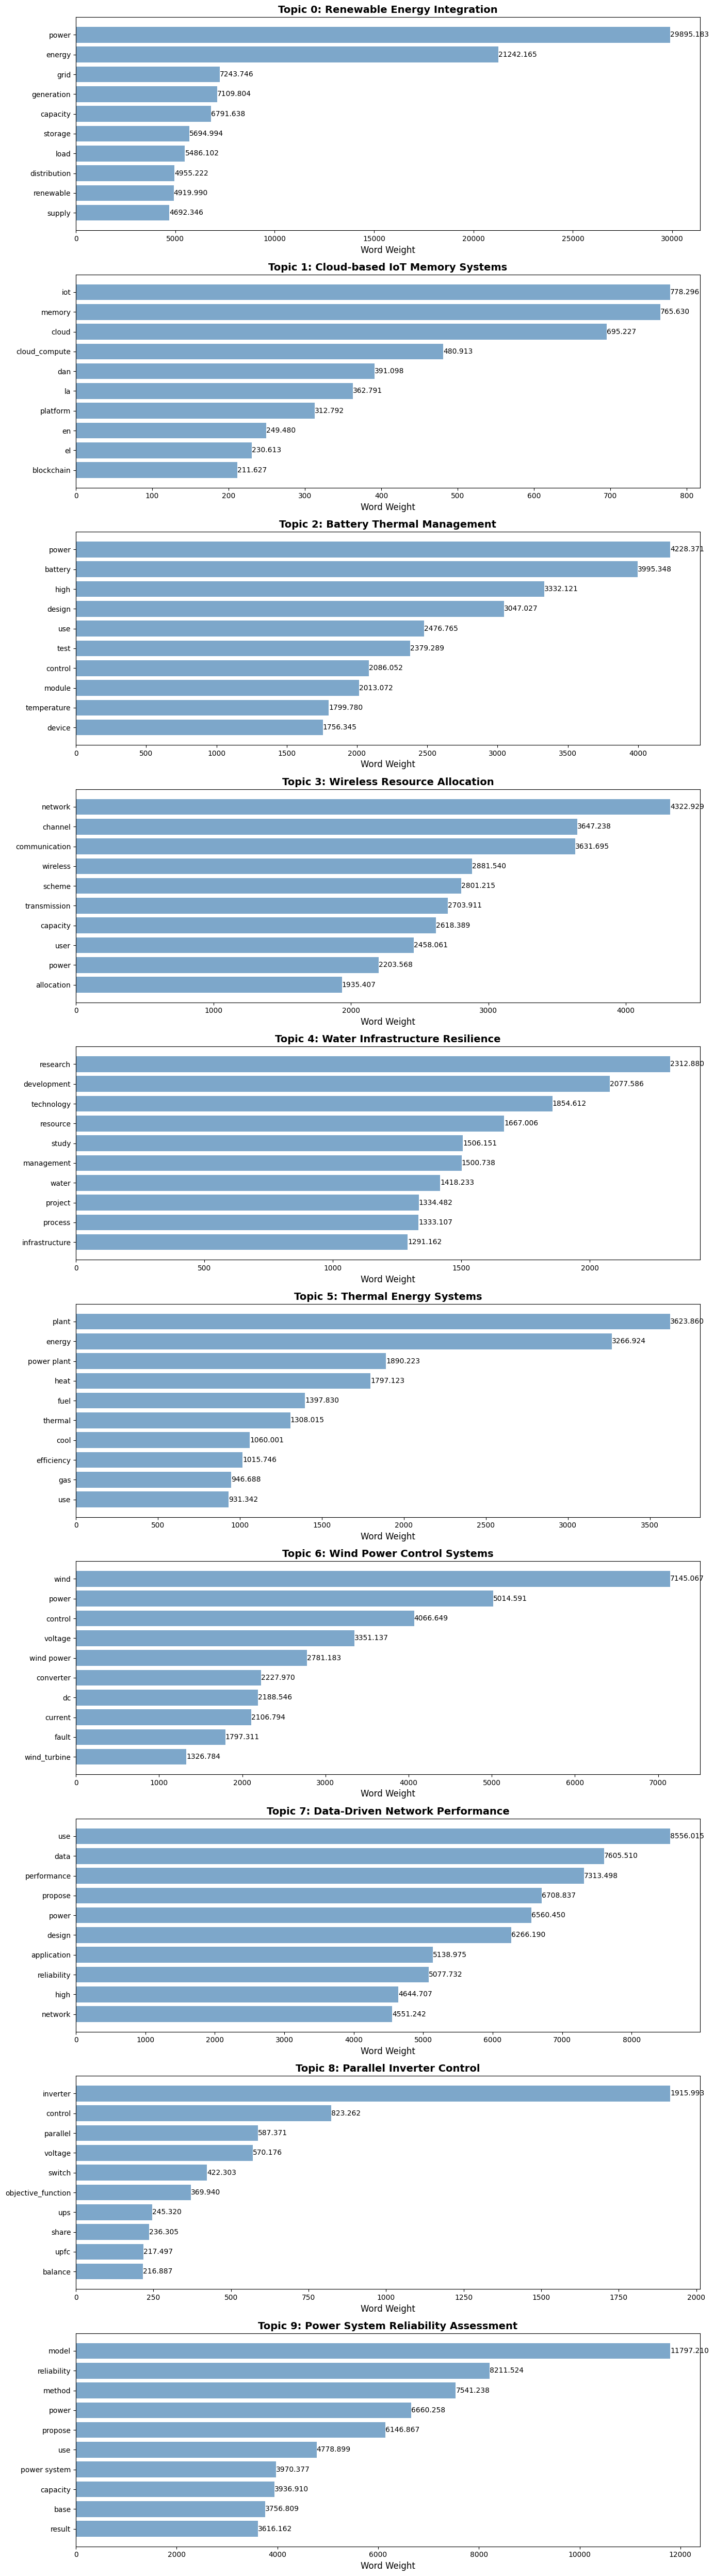

2. Topic Importance:


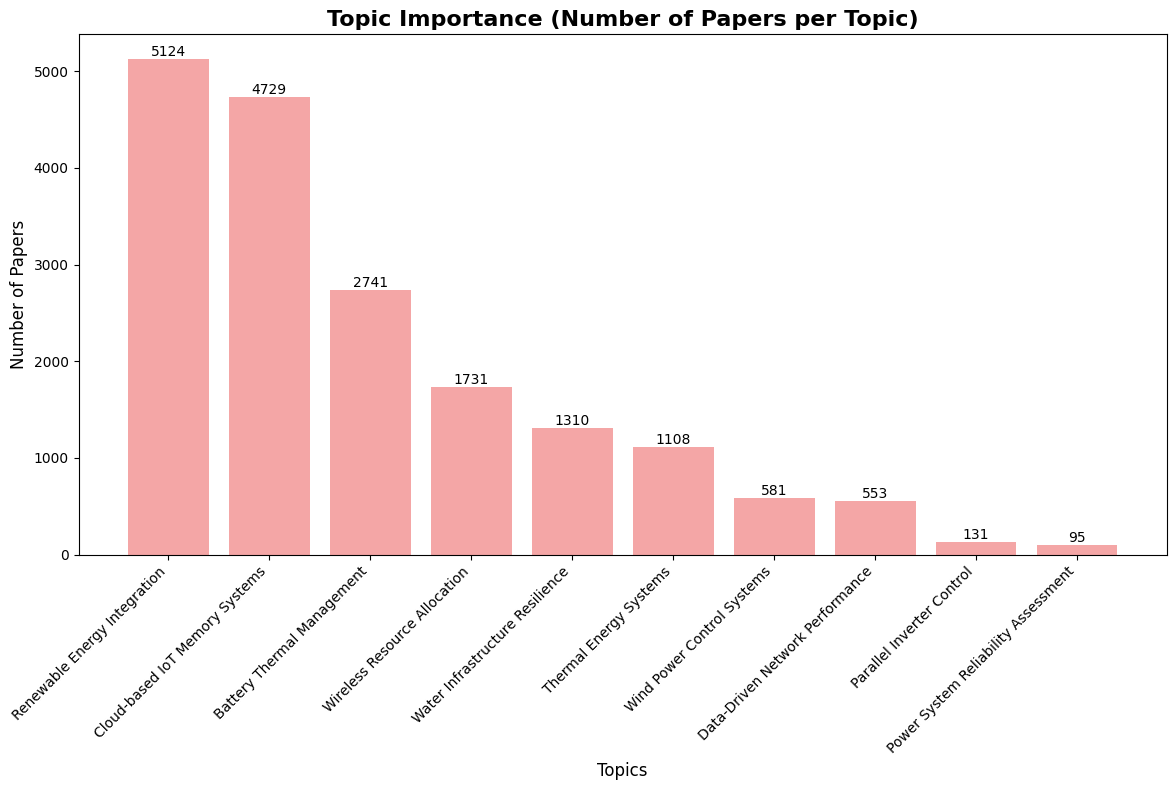

3. Topic Distribution Map:


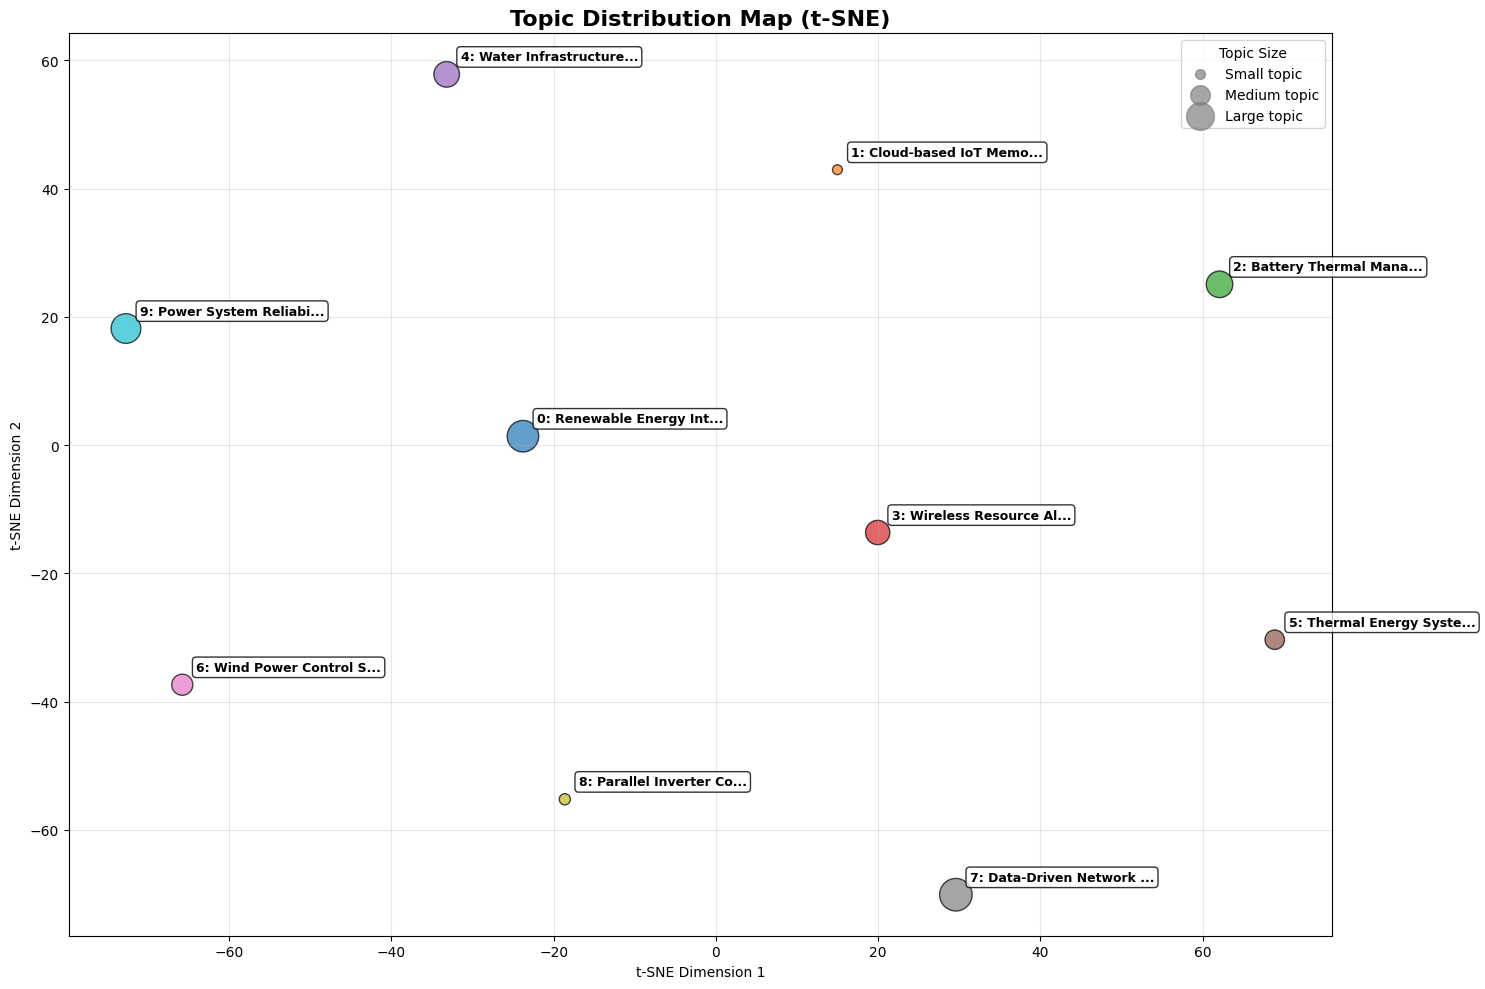


Topic sizes (number of papers):
Topic 0 (Renewable Energy Integration): 3853 papers
Topic 1 (Cloud-based IoT Memory Systems): 322 papers
Topic 2 (Battery Thermal Management): 1746 papers
Topic 3 (Wireless Resource Allocation): 1271 papers
Topic 4 (Water Infrastructure Resilience): 1515 papers
Topic 5 (Thermal Energy Systems): 706 papers
Topic 6 (Wind Power Control Systems): 852 papers
Topic 7 (Data-Driven Network Performance): 4639 papers
Topic 8 (Parallel Inverter Control): 350 papers
Topic 9 (Power System Reliability Assessment): 2844 papers
4. Topic-Document Distribution:


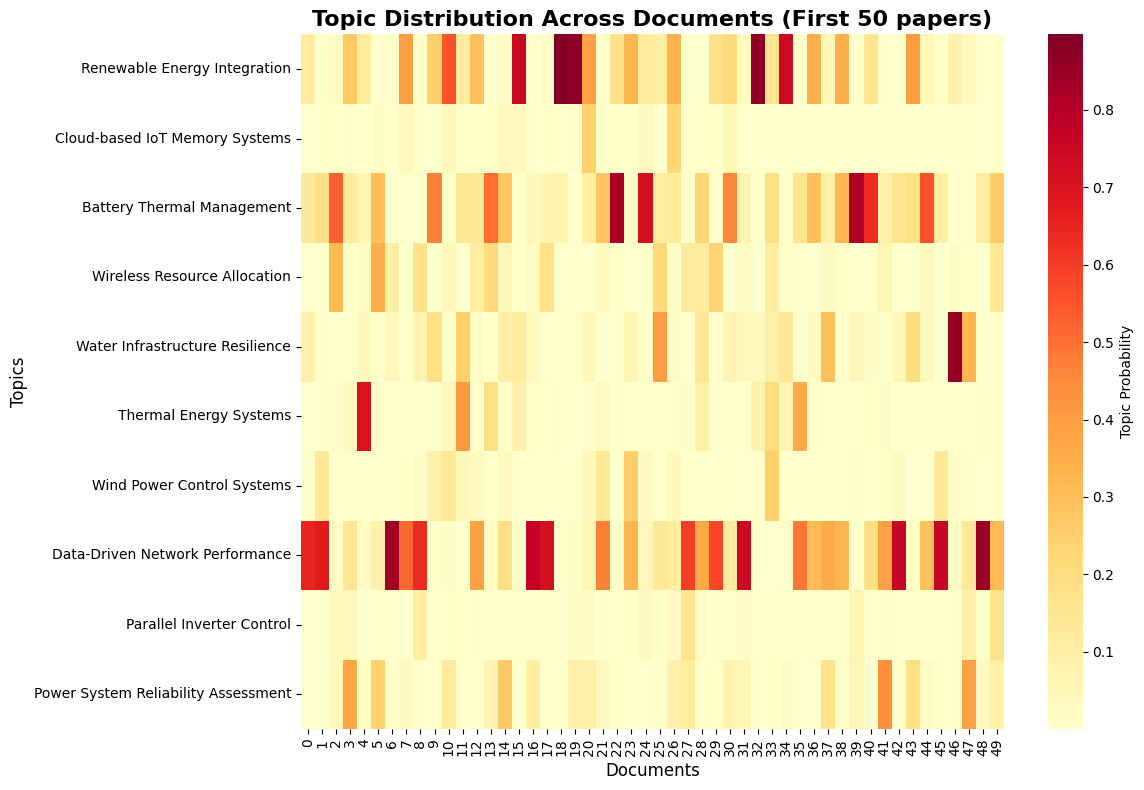

5. N-gram Analysis per Topic:


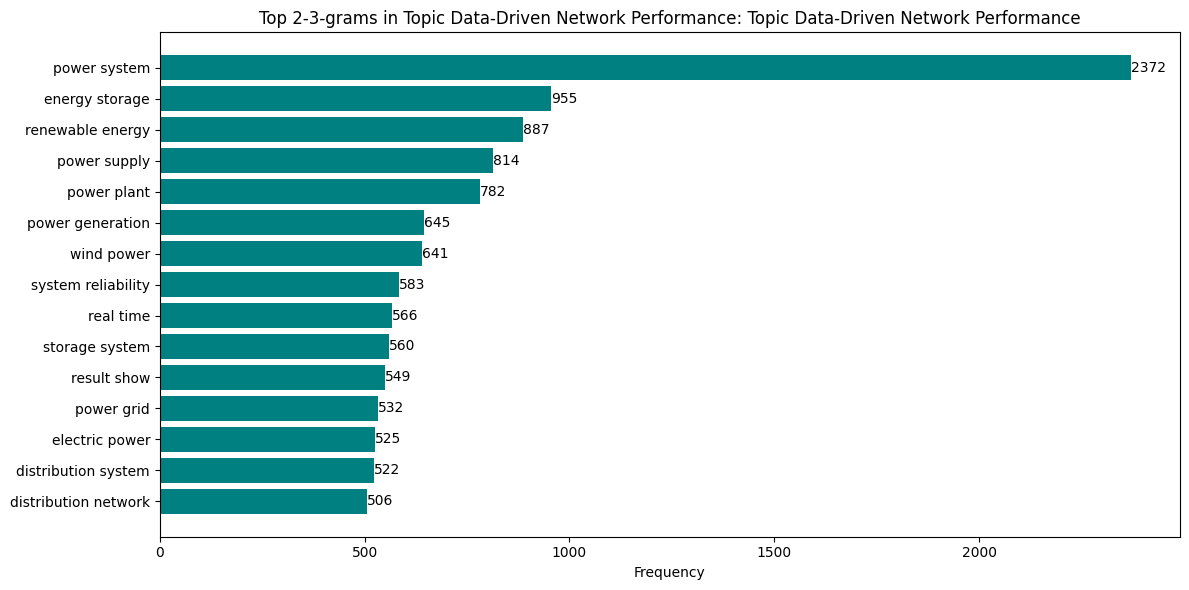

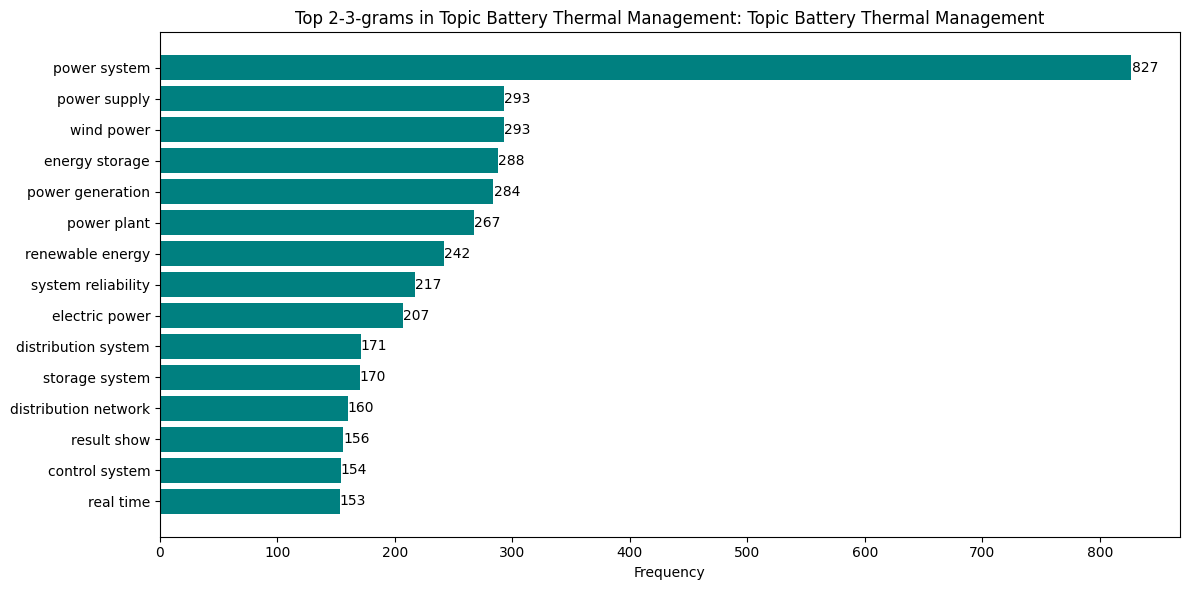

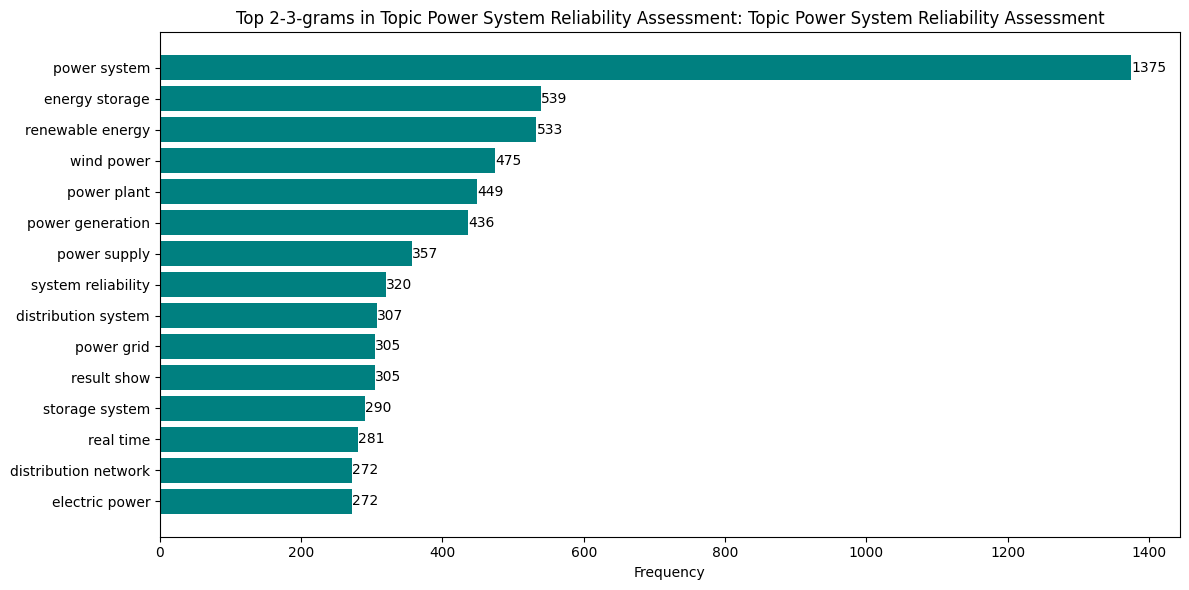

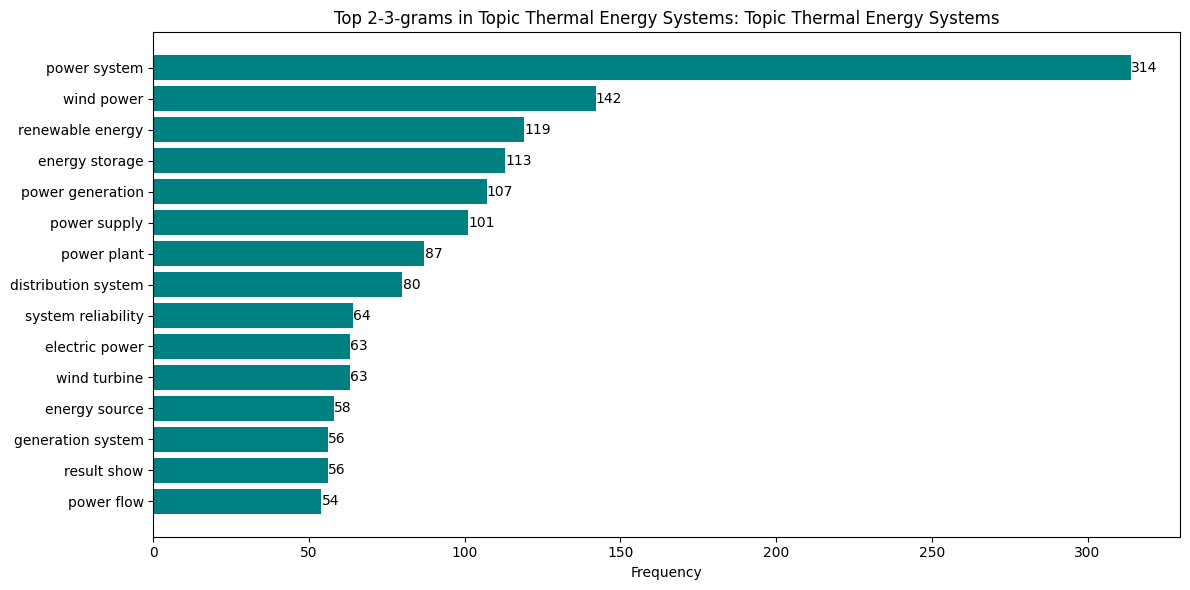

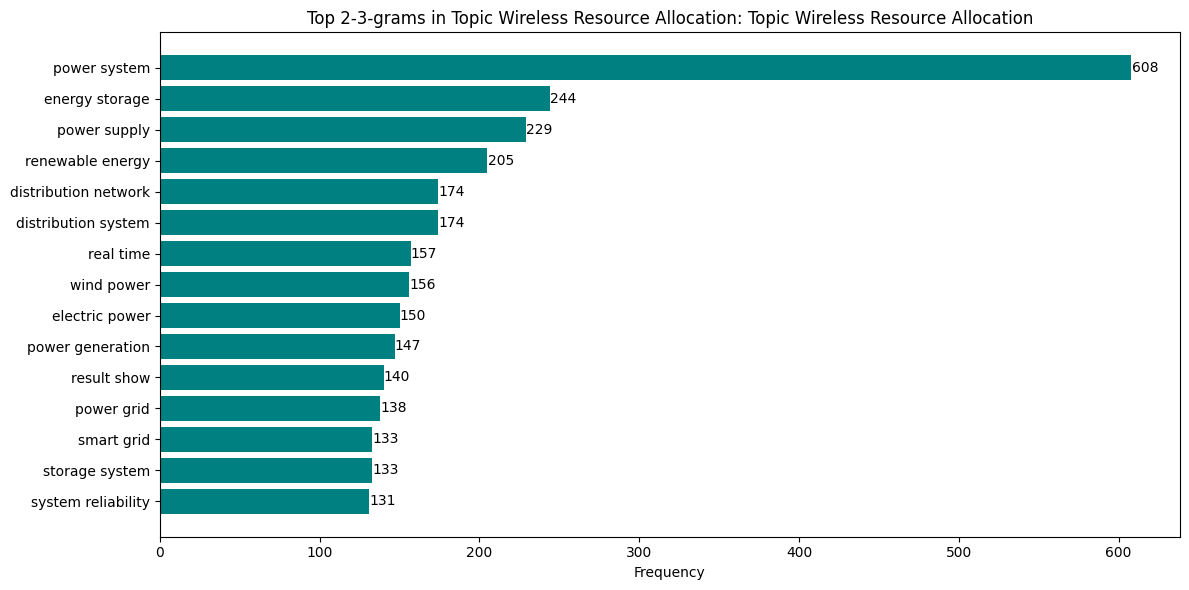

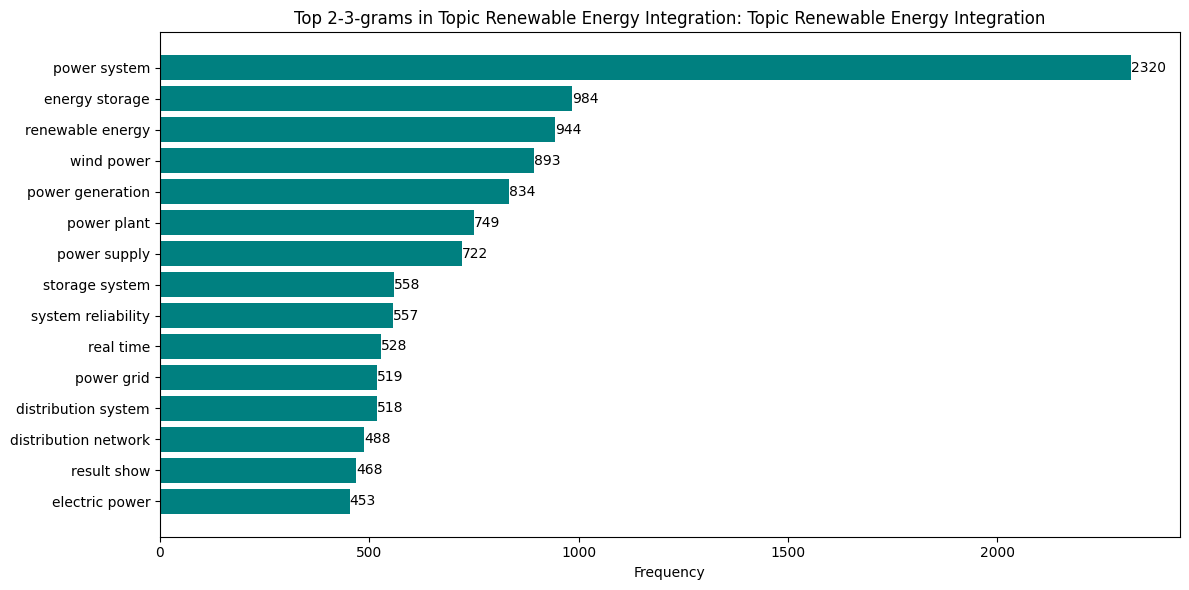

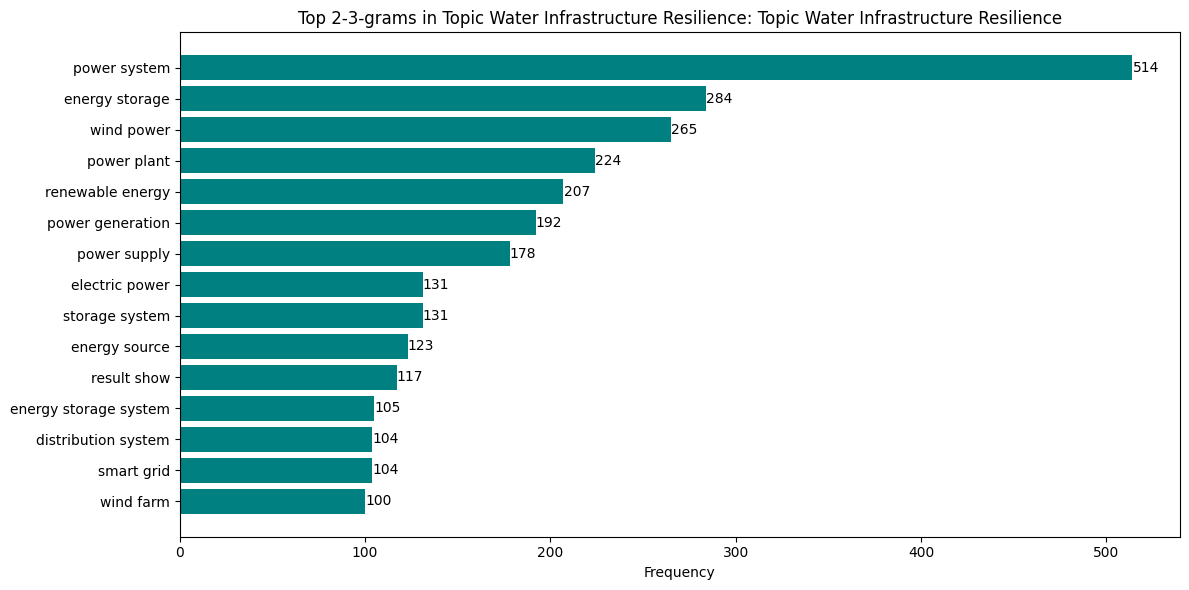

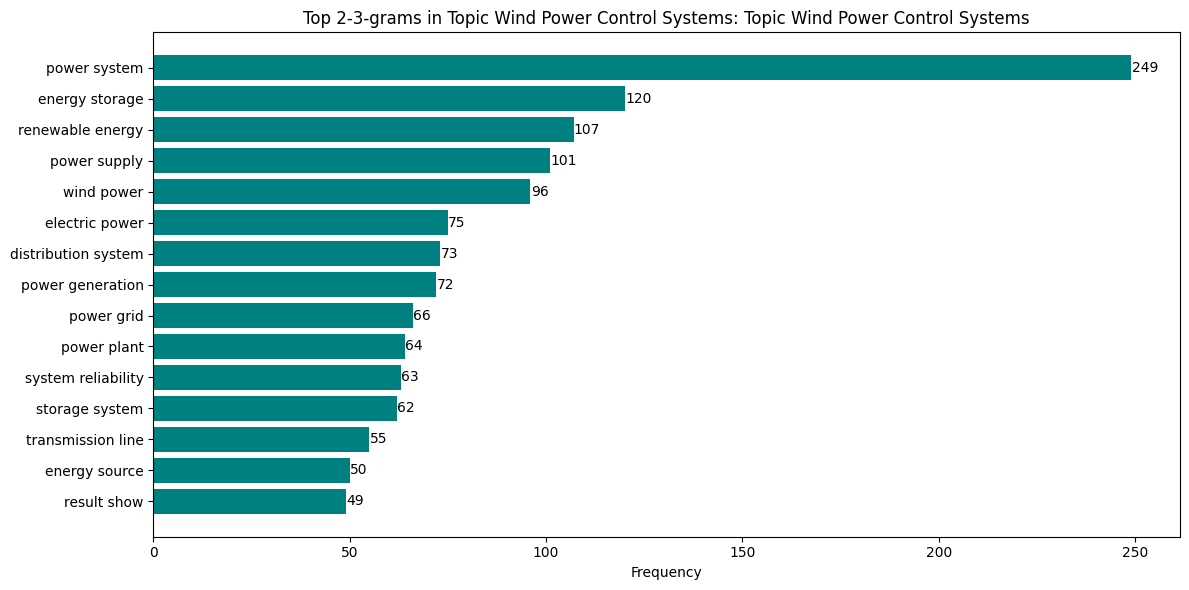

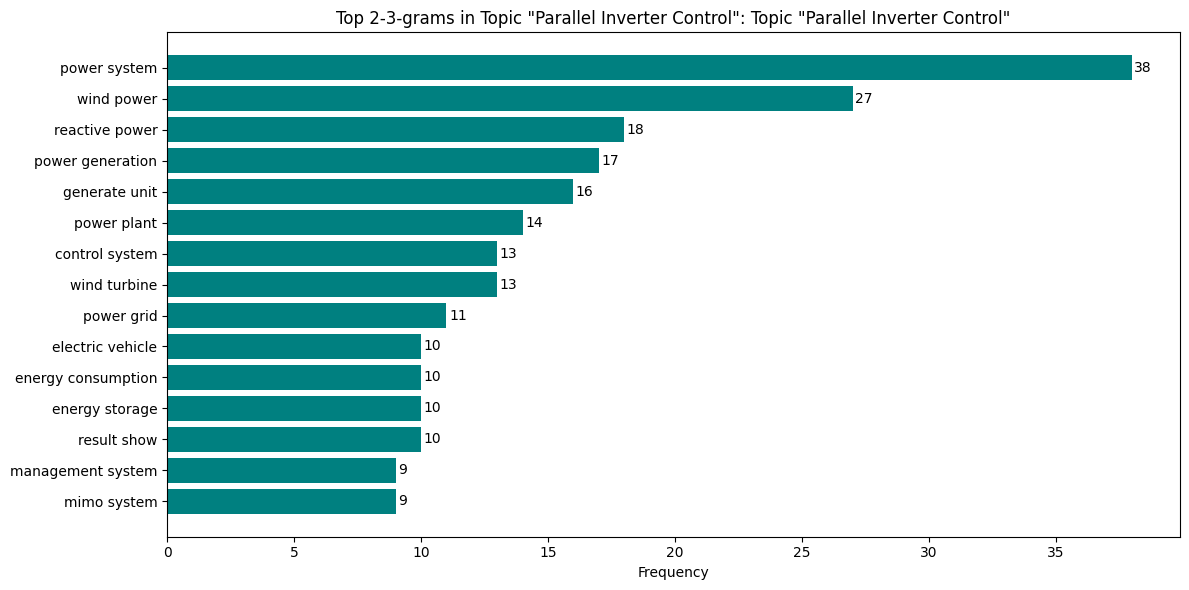

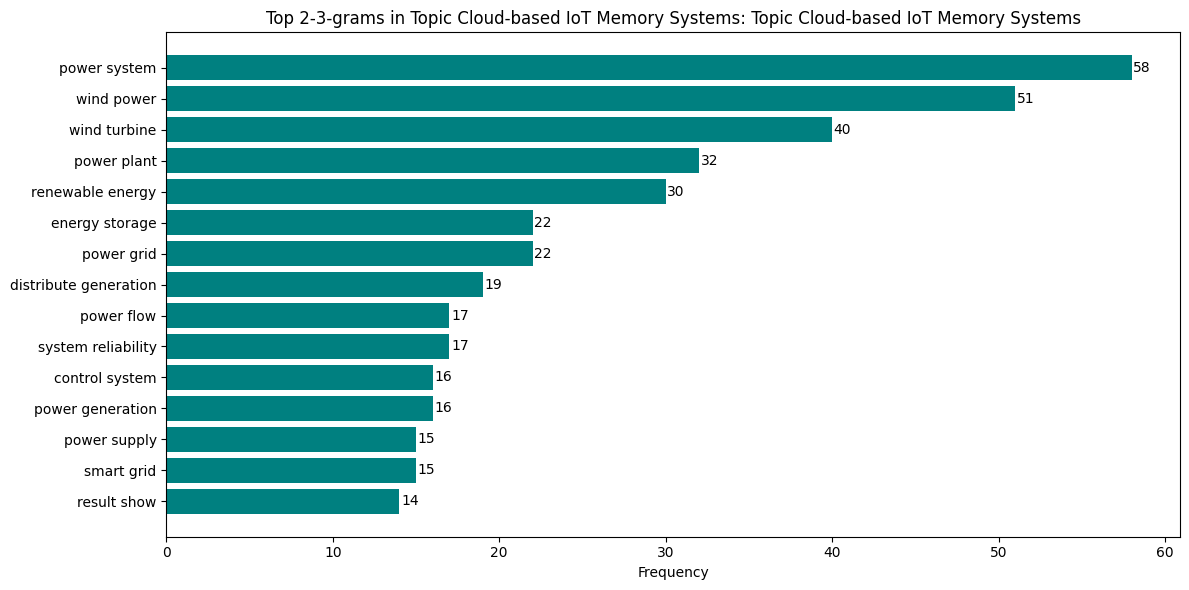

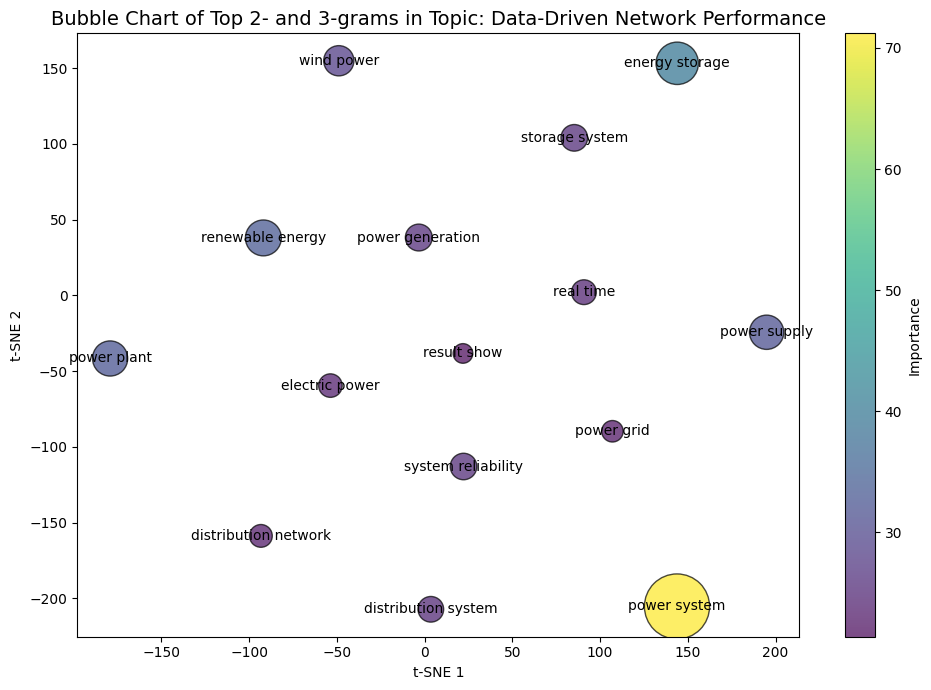

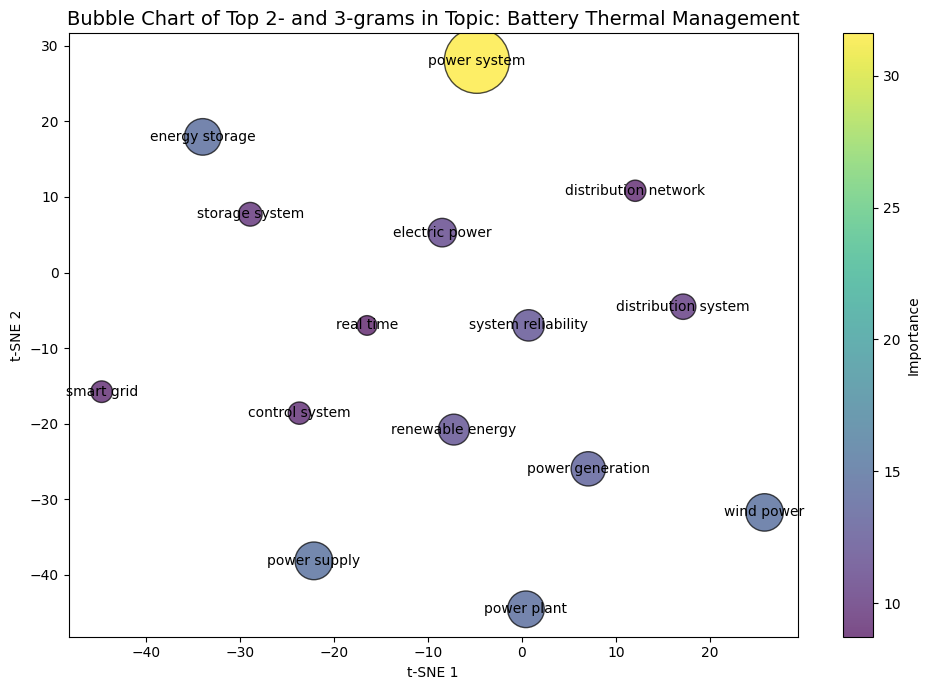

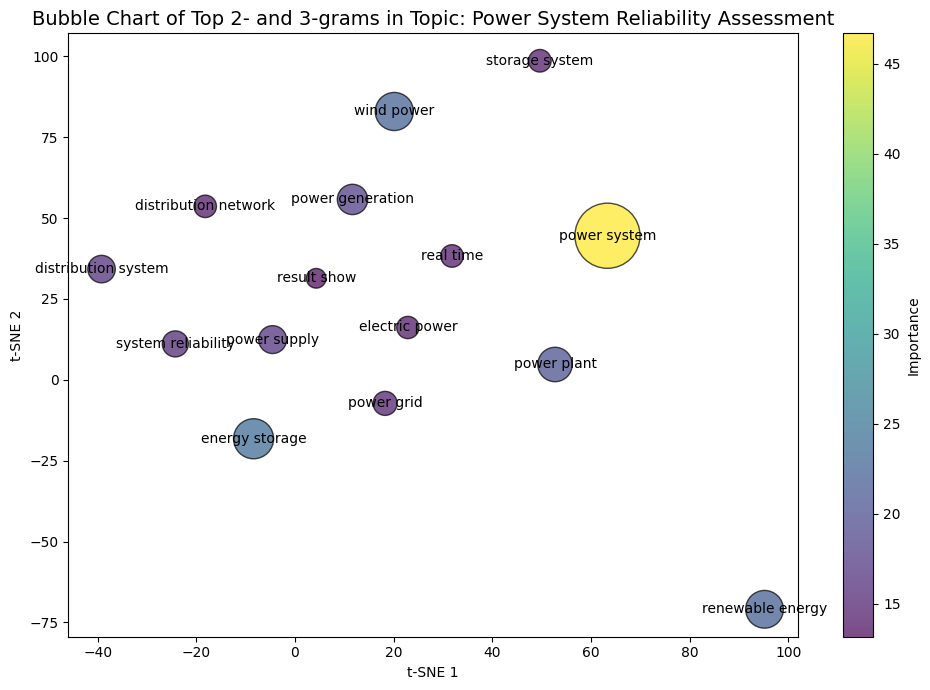

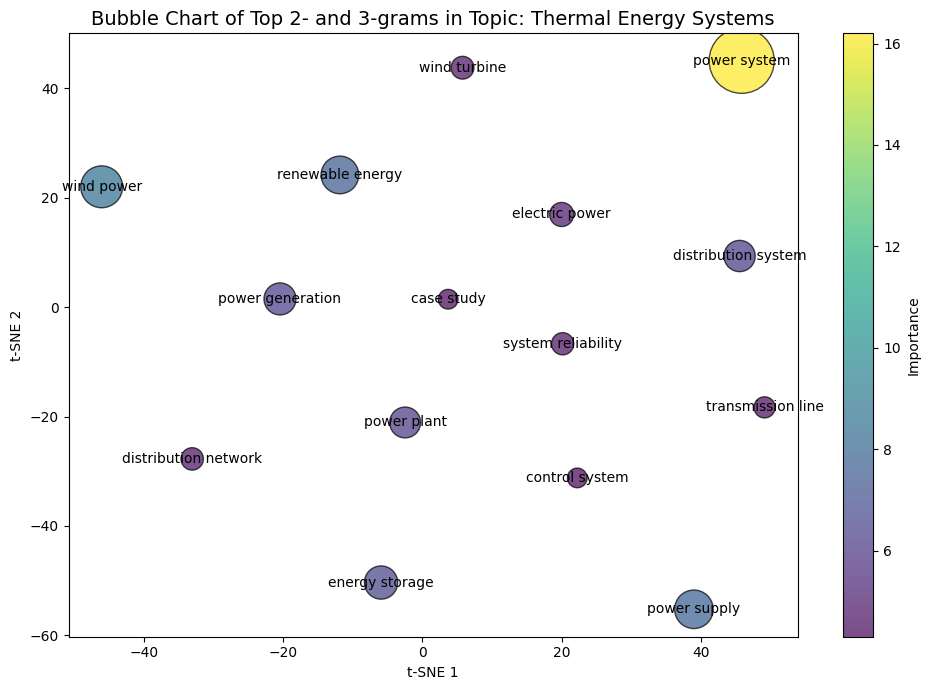

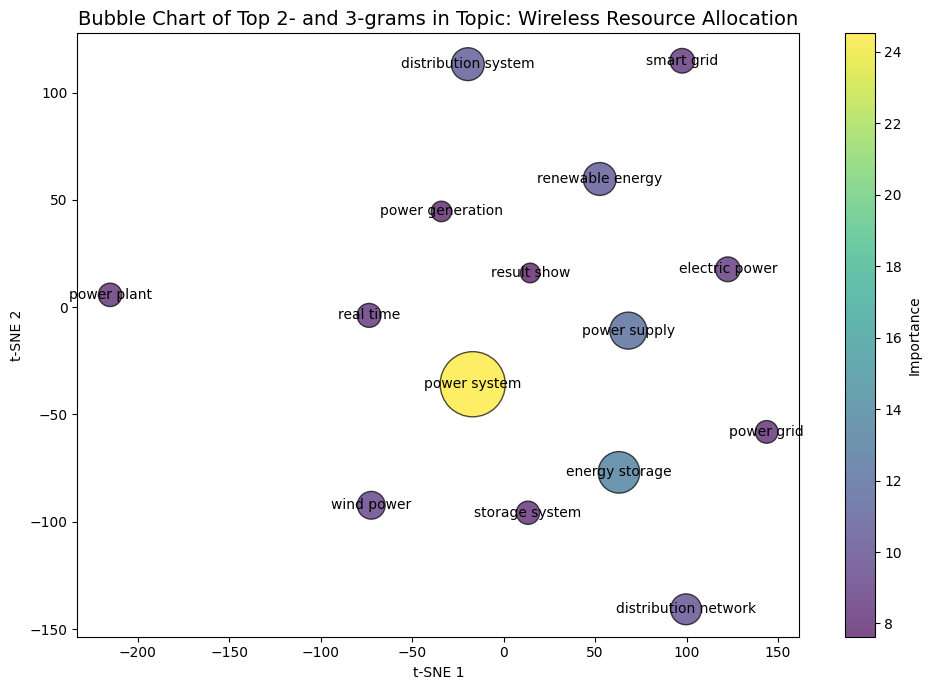

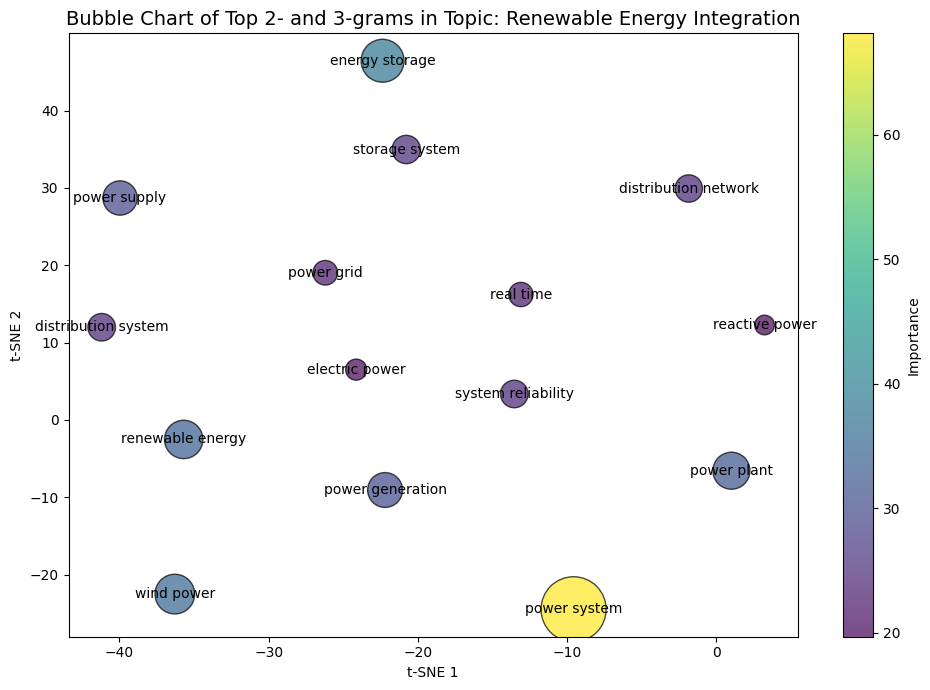

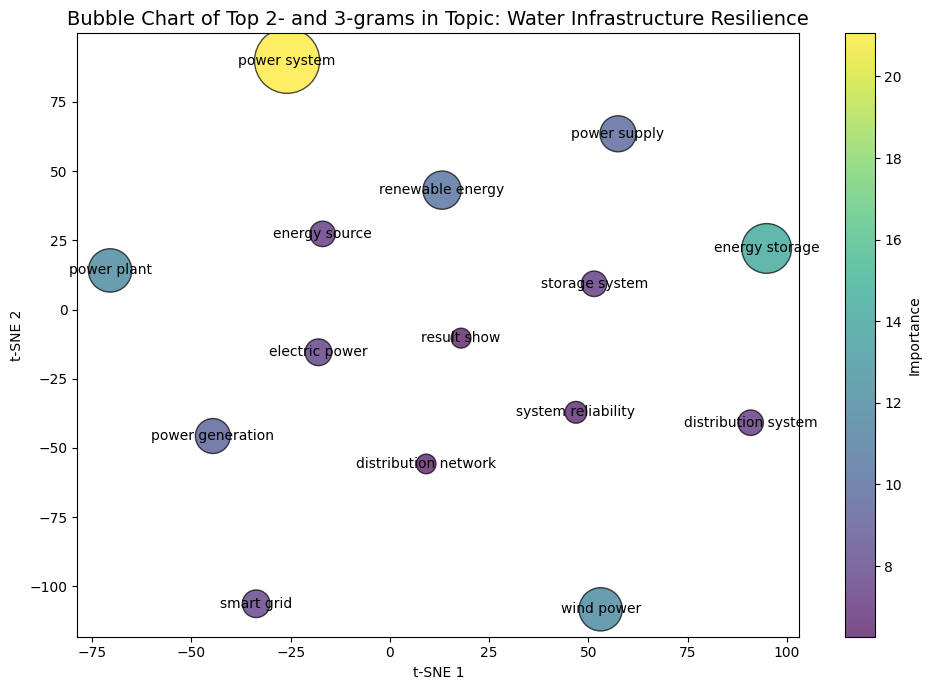

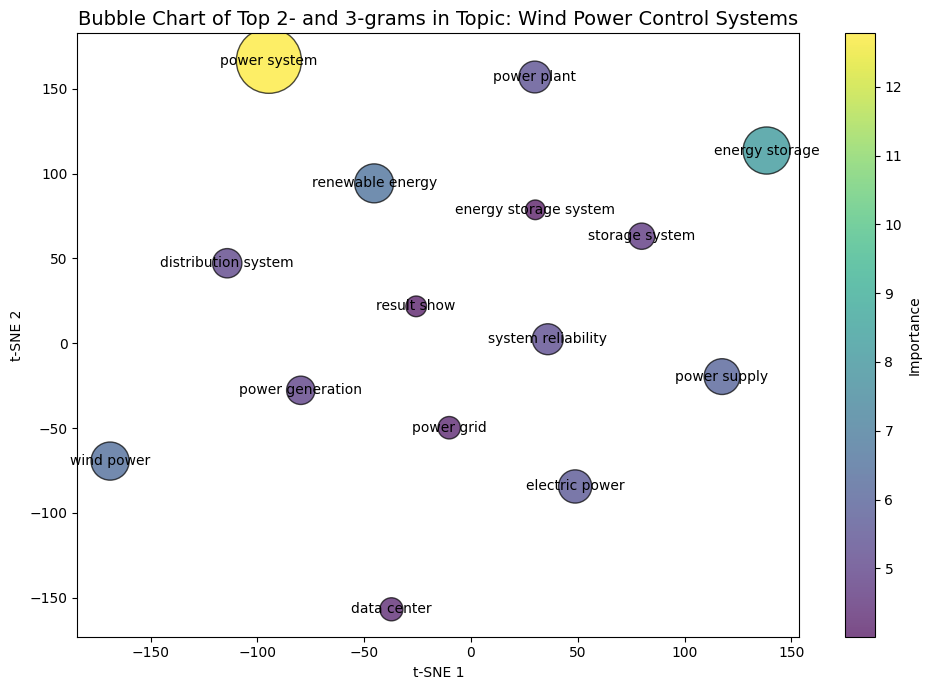

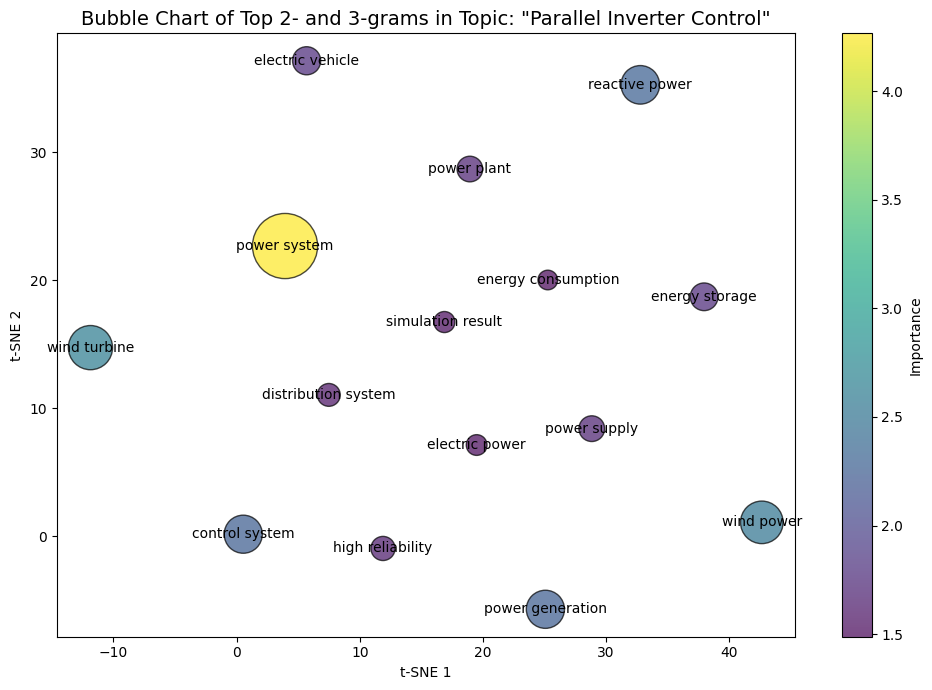

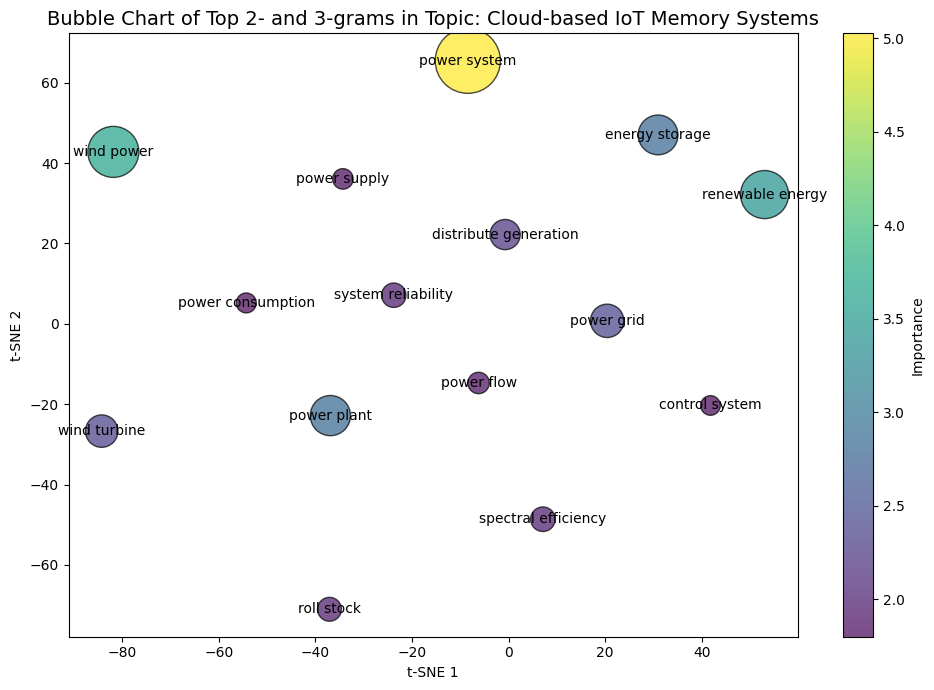

In [162]:
# Now you can use all the visualization functions
#plot_topic_keywords_with_names(topic_keywords, topic_names)
#plot_topic_importance_with_names(df_analyzed, topic_names)
visualize_complete_analysis_from_files(analysis_data)

### Additional visualizations to highlight the different keywords and ngrams in LDA and TFID

In [119]:
# intermediate solution to get the tfidf terms (should be included in the analaysis)

from sklearn.feature_extraction.text import TfidfVectorizer

# Use the same processed text column as for LDA
corpus = df_analyzed['processed_text'].fillna('').astype(str).tolist()

tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),  # unigrams, bigrams, trigrams
    min_df=5,            # filter rare n-grams
    max_df=0.95,         # filter very common n-grams
    stop_words='english' # or your custom stopword list
)
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
feature_names = tfidf_vectorizer.get_feature_names_out()

import pandas as pd

# Suppose df_analyzed['Primary_Topic_Index'] is your topic index column (float)
df_analyzed['Primary_Topic_Index'] = df_analyzed['Primary_Topic_Index'].round().astype('Int64')






In [ ]:
print(df_analyzed['Primary_Topic_Index'].unique())

<IntegerArray>
[9, 2, 8, 7, 3, 5, 0, 1, <NA>, 4, 6]
Length: 11, dtype: Int64


In [124]:
import numpy as np

def get_top_tfidf_ngrams_per_topic(df, tfidf_matrix, feature_names, topic_col='Primary_Topic_Index', top_k=10):
    """Group by integer topic indices, not names"""
    tfidf_ngrams = {}
    for topic_idx in df[topic_col].dropna().unique():
        # Ensure topic index is integer
        topic_idx = int(topic_idx)
        # Get documents for this topic
        doc_indices = df[df[topic_col] == topic_idx].index
        if len(doc_indices) == 0:
            continue
        # Compute mean TF-IDF and extract top terms
        topic_tfidf = np.asarray(tfidf_matrix[doc_indices].mean(axis=0)).ravel()
        top_indices = topic_tfidf.argsort()[-top_k:][::-1]
        top_terms = [(feature_names[i], topic_tfidf[i]) for i in top_indices if topic_tfidf[i] > 0]
        tfidf_ngrams[topic_idx] = top_terms
    return tfidf_ngrams

tfidf_ngrams = get_top_tfidf_ngrams_per_topic(df_analyzed, tfidf_matrix, feature_names, topic_col='Primary_Topic_Index', top_k=10)

In [84]:
def plot_topic_keywords_ngrams(topic_keywords, tfidf_ngrams, topic_idx, top_k=10):
    # LDA topic keywords (including n-grams)
    lda_terms = [kw for kw in topic_keywords[topic_idx]['top_words'][:top_k]]
    lda_weights = [w for _, w in topic_keywords[topic_idx]['word_weights'][:top_k]]
    # TF-IDF n-grams for this topic (assume you have this as a dict: topic_idx -> list of (ngram, score))
    tfidf_terms = set([ngram for ngram, _ in tfidf_ngrams[topic_idx][:top_k]])
    colors = ['orange' if term in tfidf_terms else 'skyblue' for term in lda_terms]
    plt.figure(figsize=(10, 6))
    plt.barh(lda_terms, lda_weights, color=colors)
    plt.xlabel('Importance (LDA weight)')
    plt.title(f'Topic {topic_idx}: LDA keywords (orange = also top TF-IDF n-gram)')
    plt.gca().invert_yaxis()
    plt.show()
def plot_topic_trends_over_time(df, topic_col='Primary_Topic', year_col='year', top_n=5):
    topic_year = df.groupby([year_col, topic_col]).size().reset_index(name='count')
    top_topics = topic_year.groupby(topic_col)['count'].sum().nlargest(top_n).index
    topic_year = topic_year[topic_year[topic_col].isin(top_topics)]
    import seaborn as sns
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=topic_year, x=year_col, y='count', hue=topic_col, marker='o')
    plt.title('Topic Trends Over Time')
    plt.ylabel('Number of Papers')
    plt.show()
def plot_term_trends(df, terms, year_col='year', text_col='processed_text'):
    trend_data = df.groupby(year_col)[text_col].apply(
        lambda docs: {term: sum(term in doc for doc in docs) for term in terms}
    ).reset_index()
    plt.figure(figsize=(12, 6))
    for term in terms:
        plt.plot(trend_data[year_col], trend_data[text_col].apply(lambda x: x.get(term, 0)), label=term)
    plt.legend()
    plt.title('Term Frequency Over Time')
    plt.show()
import networkx as nx

def plot_paper_topic_network(df, topic_col='Primary_Topic', paper_col='title', year_col='year'):
    G = nx.Graph()
    for _, row in df.iterrows():
        paper = row[paper_col]
        topic = row[topic_col]
        year = row[year_col]
        G.add_node(paper, type='paper', year=year)
        G.add_node(topic, type='topic')
        G.add_edge(paper, topic)
    pos = nx.spring_layout(G, k=0.5)
    node_colors = ['skyblue' if G.nodes[n]['type']=='paper' else 'orange' for n in G.nodes]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_size=8, node_size=200)
    plt.title('Paper-Topic Network')
    plt.show()


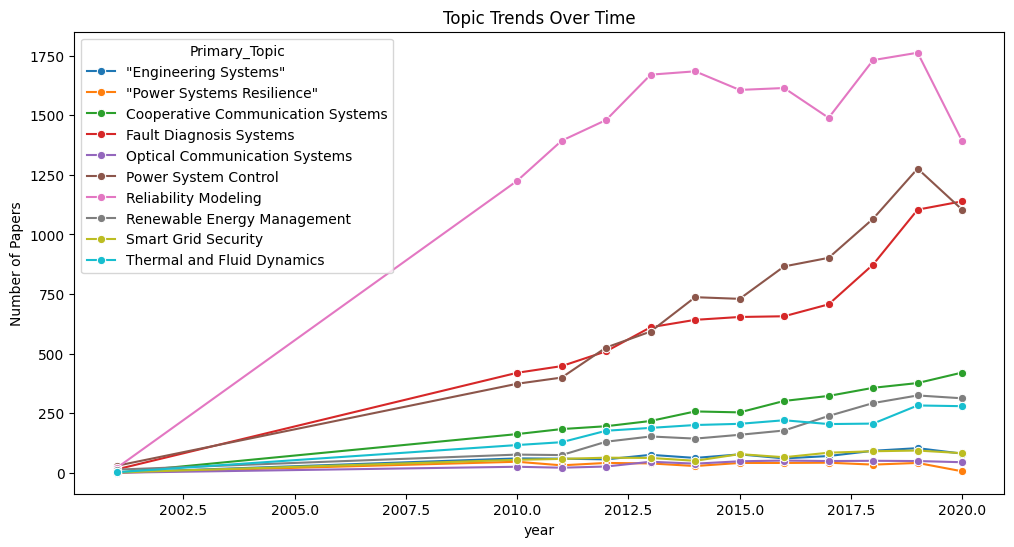

In [128]:
plot_topic_trends_over_time(df_analyzed, topic_col='Primary_Topic', year_col='year', top_n=15)

In [129]:

plot_term_trends(df_analyzed, terms=['reliability', 'resilience', 'power systems'], year_col='year', text_col='processed_text')

TypeError: argument of type 'float' is not iterable

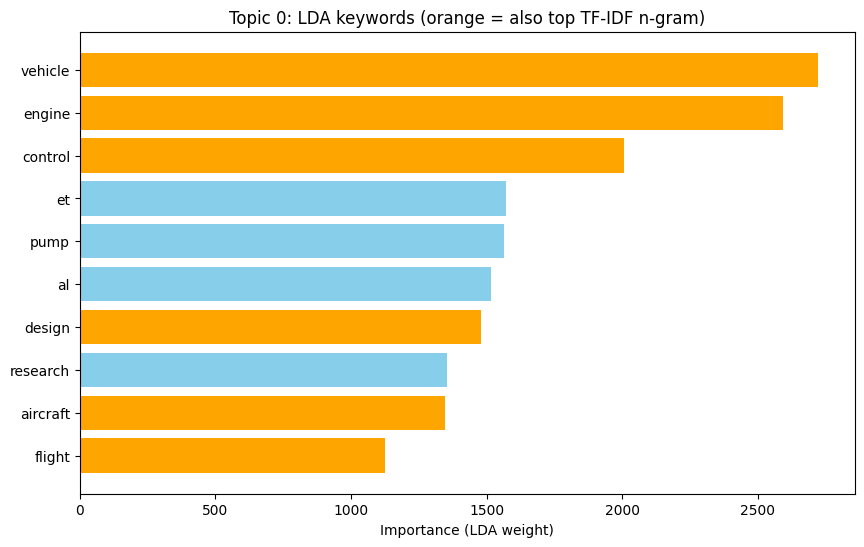

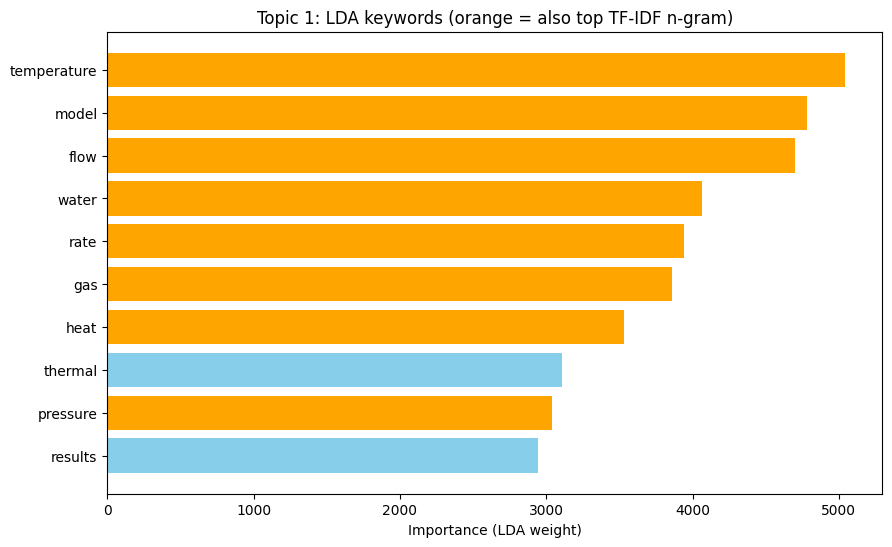

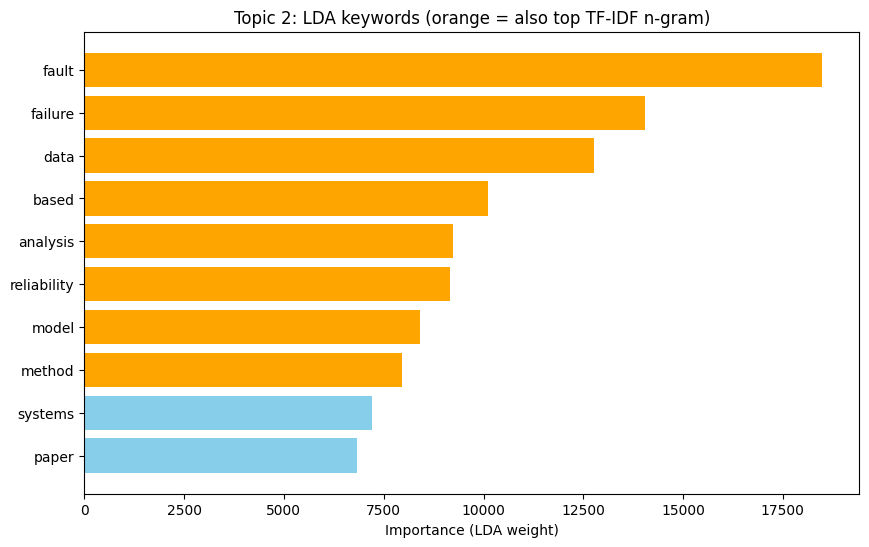

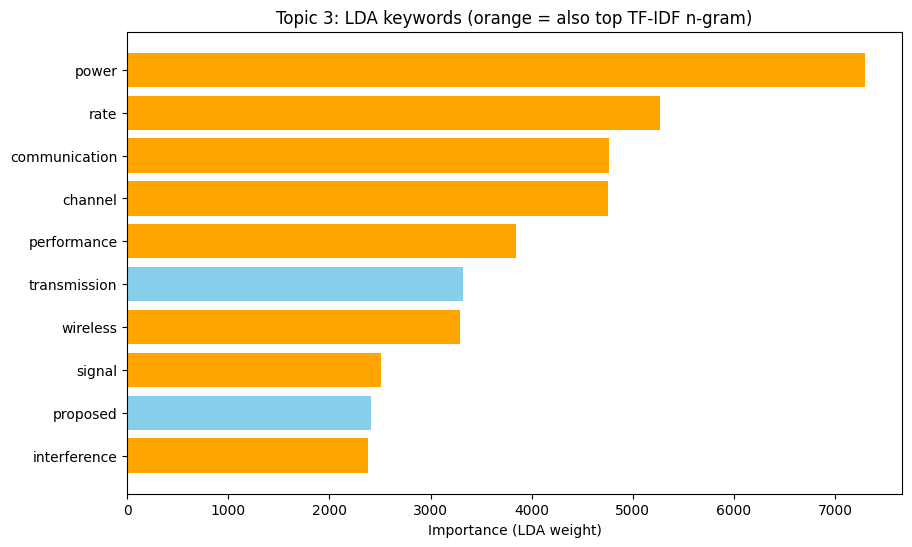

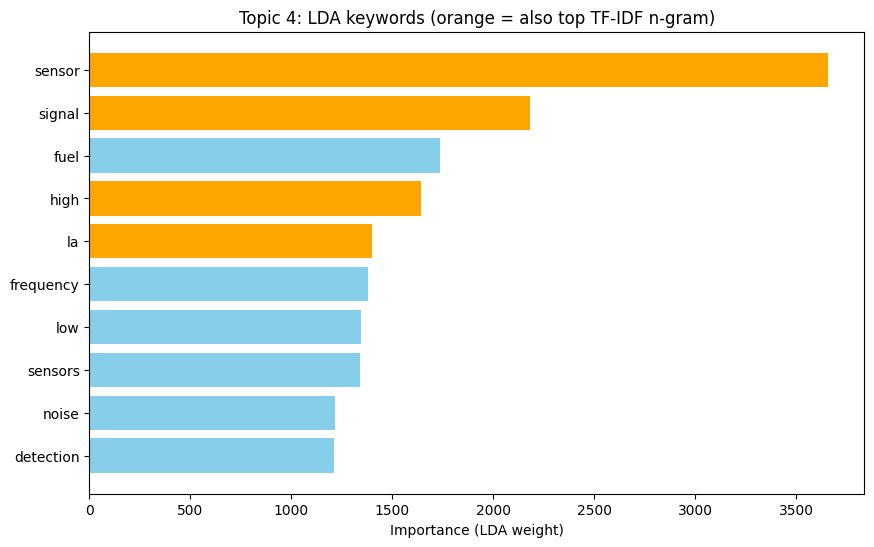

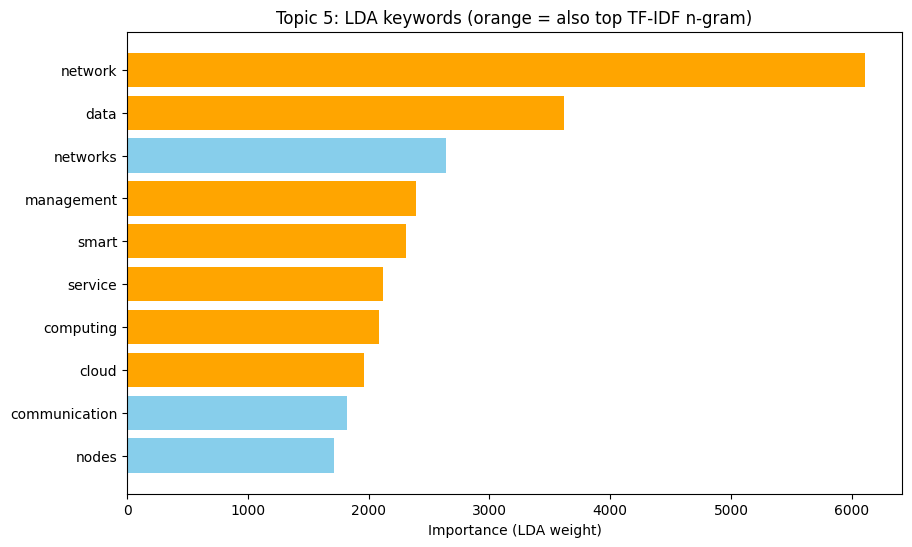

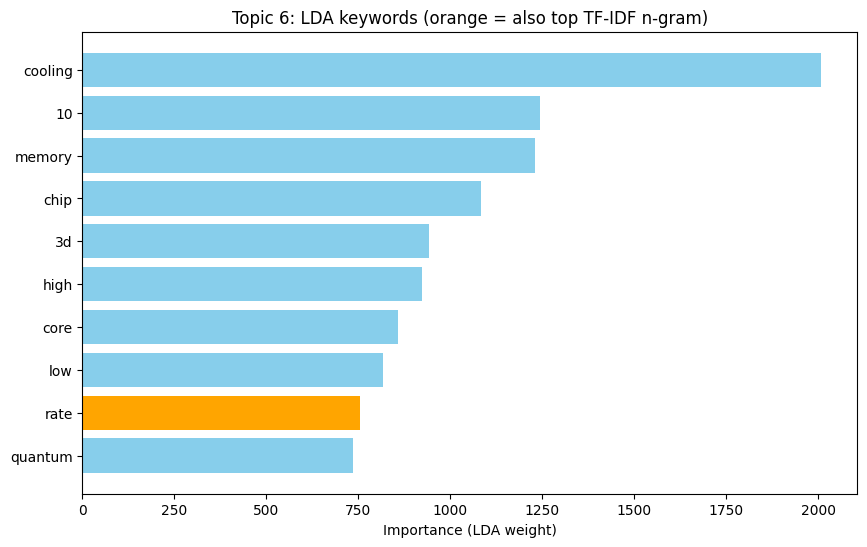

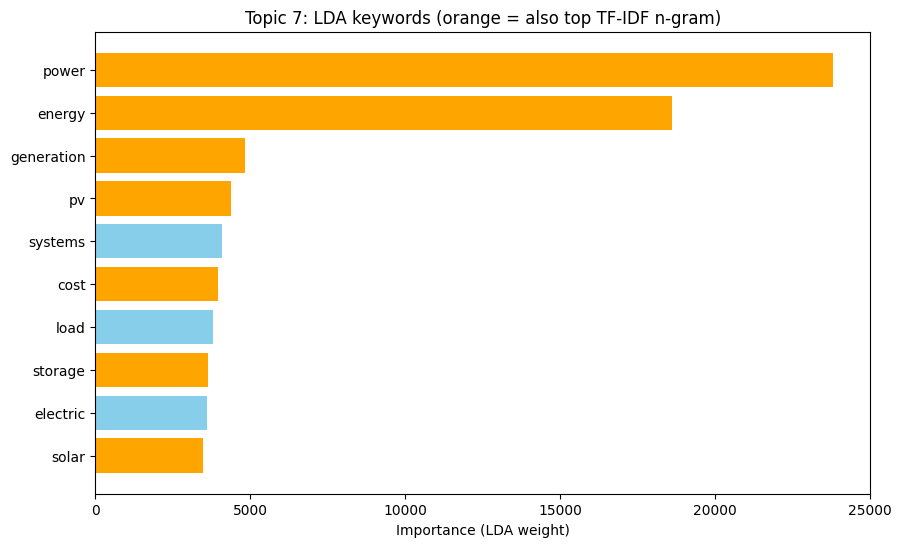

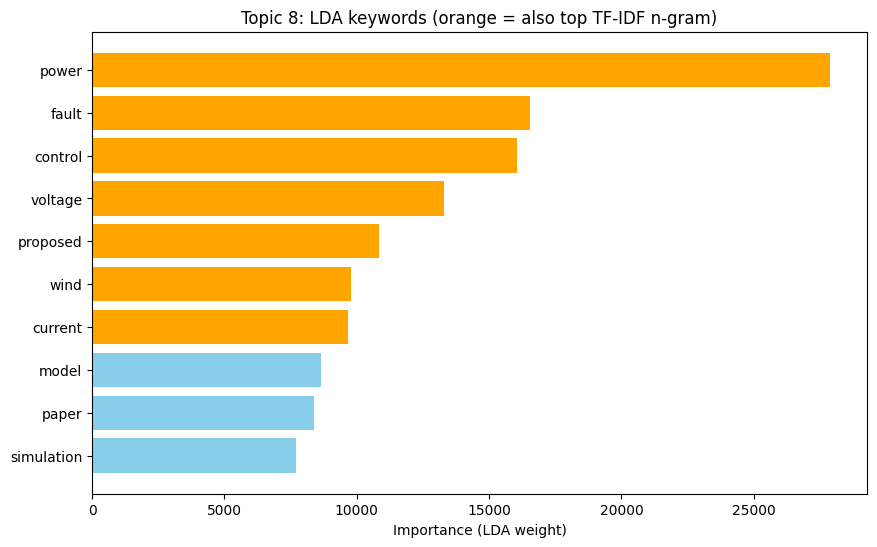

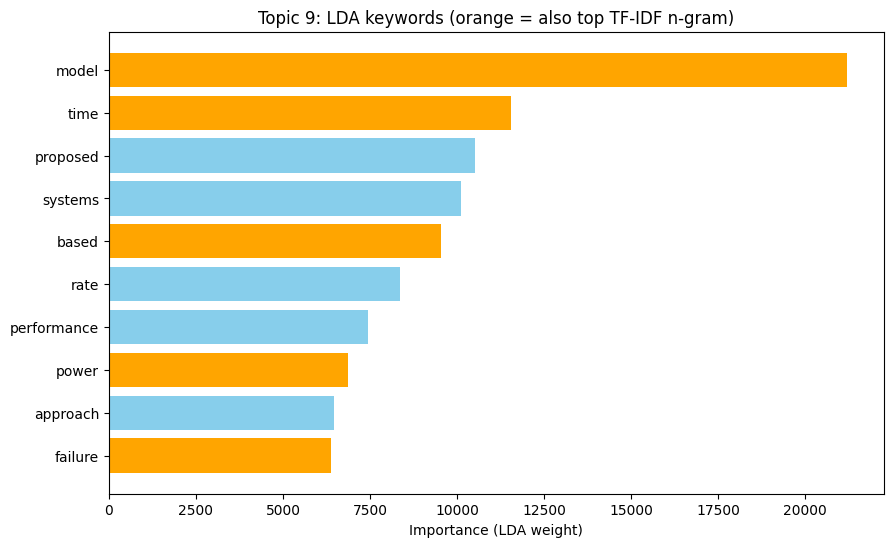

In [126]:
# If topic_keywords has string keys, convert to integers:
topic_keywords = {int(k): v for k, v in topic_keywords.items()}

# If tfidf_ngrams has string keys, convert to integers:
#tfidf_ngrams = {int(k): v for k, v in tfidf_ngrams.items()}


for topic_idx_str in topic_names['all']:
    topic_idx = int(topic_idx_str)  # Convert string to integer
    plot_topic_keywords_ngrams(topic_keywords, tfidf_ngrams, topic_idx)




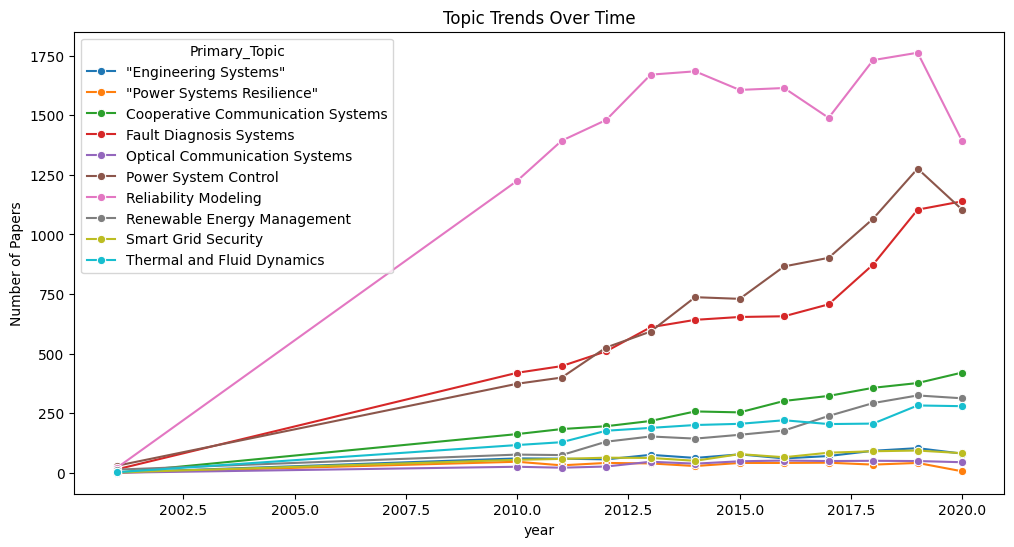

TypeError: argument of type 'float' is not iterable

In [97]:
plot_topic_trends_over_time(df_analyzed, topic_col='Primary_Topic', year_col='year', top_n=10)
plot_term_trends(df_analyzed, terms=['reliability', 'resilience'], year_col='year', text_col='processed_text')

In [25]:
# Usage after your analysis
visualize_complete_analysis(df_analyzed, topic_keywords, topic_names, 
                           #lda_model, vectorizer, topic_distributions
                           )


NameError: name 'topic_keywords' is not defined